这是一个用于临时测试代码的ipynb文件

In [1]:
import os
import re
import string
import torch
from torch import nn
from torch.nn import functional as F
if not "CHDIR_FLAG" in dir():
    os.chdir("../")
    CHDIR_FLAG = True
    
import numpy as np
import pandas as pd
from datasets import load_dataset

from src.tools.torch import register_forward_hook_decorator, register_backward_hook_decorator
from src.tools.plot import plot_tensor_histogram, plot_tensor_heatmap
from transformers import AutoTokenizer, AutoModelForCausalLM

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from src.pipelines.analysis import horizontal_comparison_of_forward_hook, vertical_comparison_of_forward_hook

# 测试 horizontal_comparison_of_forward_hook

In [2]:
forward_hook_module_names = \
    [f"model.layers[{i}].self_attn.q_proj" for i in range(24)] + \
    [f"model.layers[{i}].self_attn.k_proj" for i in range(24)] + \
    [f"model.layers[{i}].self_attn.v_proj" for i in range(24)]

hook_data_path_1_1 = r"./results/strawberry-1/fhook+Qwen2.5-0.5B-Instruct+False.pt"
hook_data_path_1_2 = r"./results/strawberry-1/fhook+Qwen2.5-0.5B-Instruct+True.pt"
hook_data_path_2_1 = r"./results/strawberry-2/fhook+Qwen2.5-0.5B-Instruct+False.pt"
hook_data_path_2_2 = r"./results/strawberry-2/fhook+Qwen2.5-0.5B-Instruct+True.pt"

table_path_1_1 = r"./results/strawberry-1/decode+Qwen2.5-0.5B-Instruct+False.csv"
table_path_1_2 = r"./results/strawberry-1/decode+Qwen2.5-0.5B-Instruct+True.csv"
table_path_2_1 = r"./results/strawberry-2/decode+Qwen2.5-0.5B-Instruct+False.csv"
table_path_2_2 = r"./results/strawberry-2/decode+Qwen2.5-0.5B-Instruct+True.csv"

0


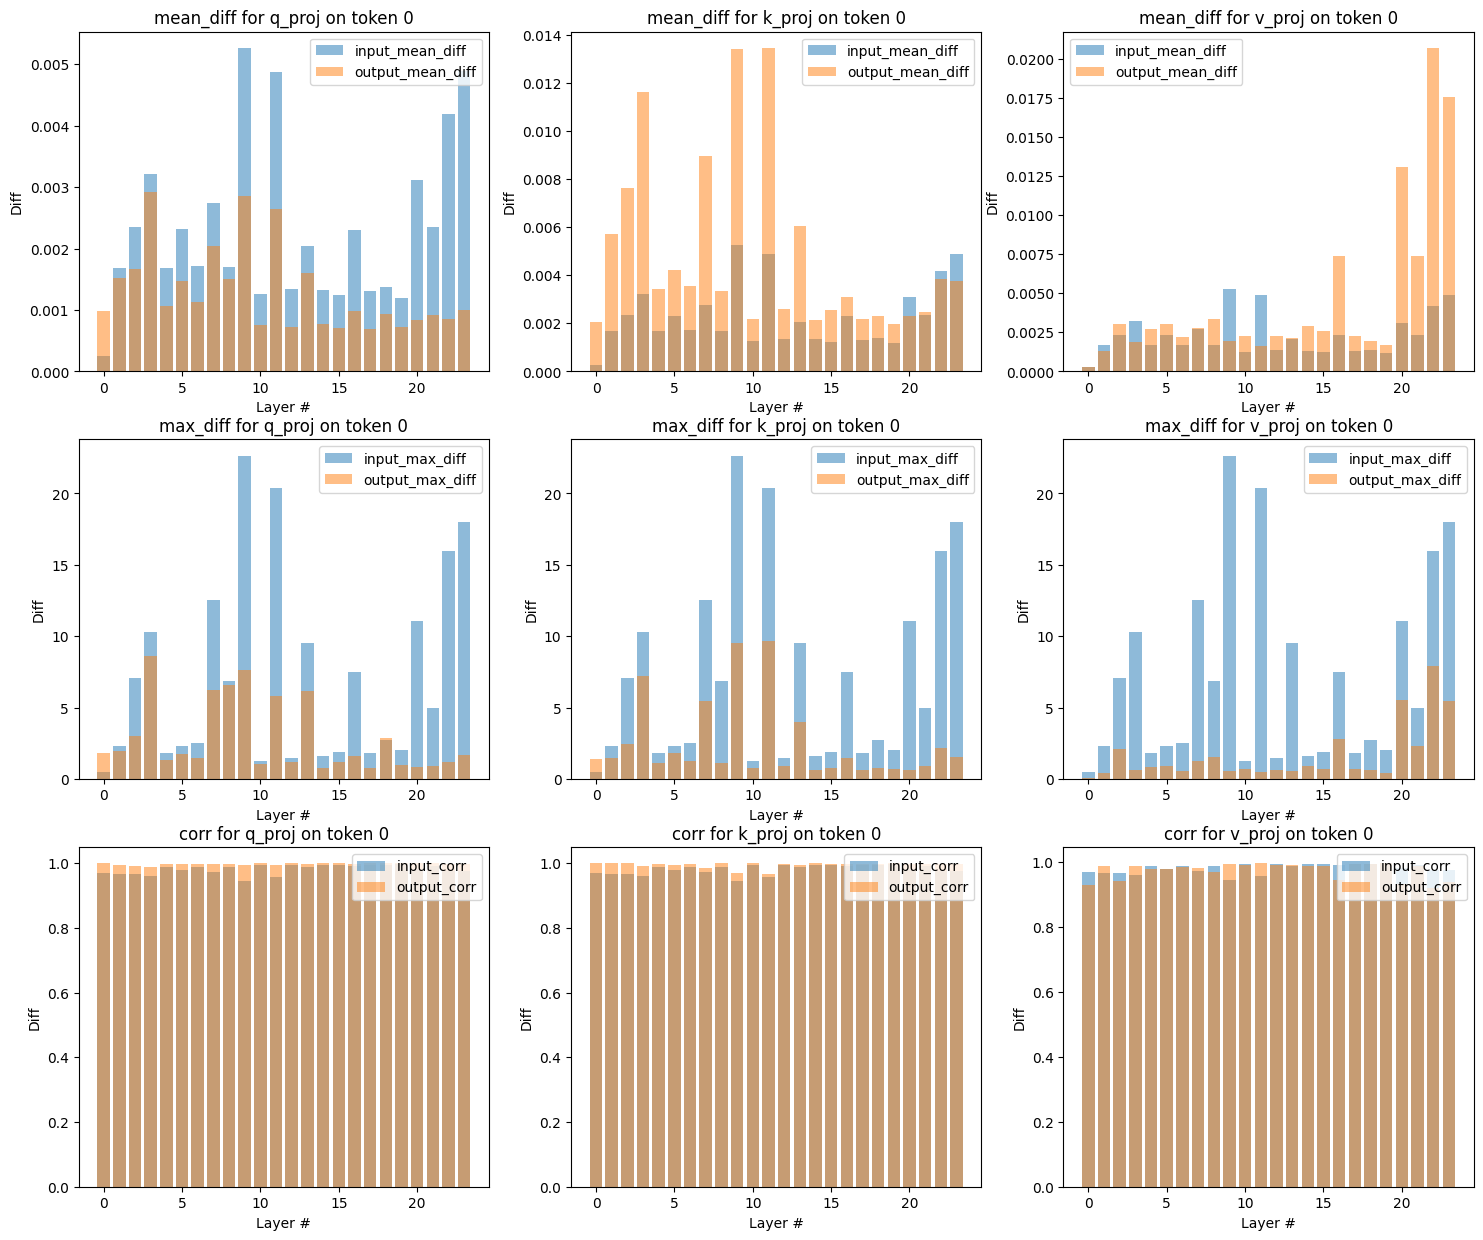

1


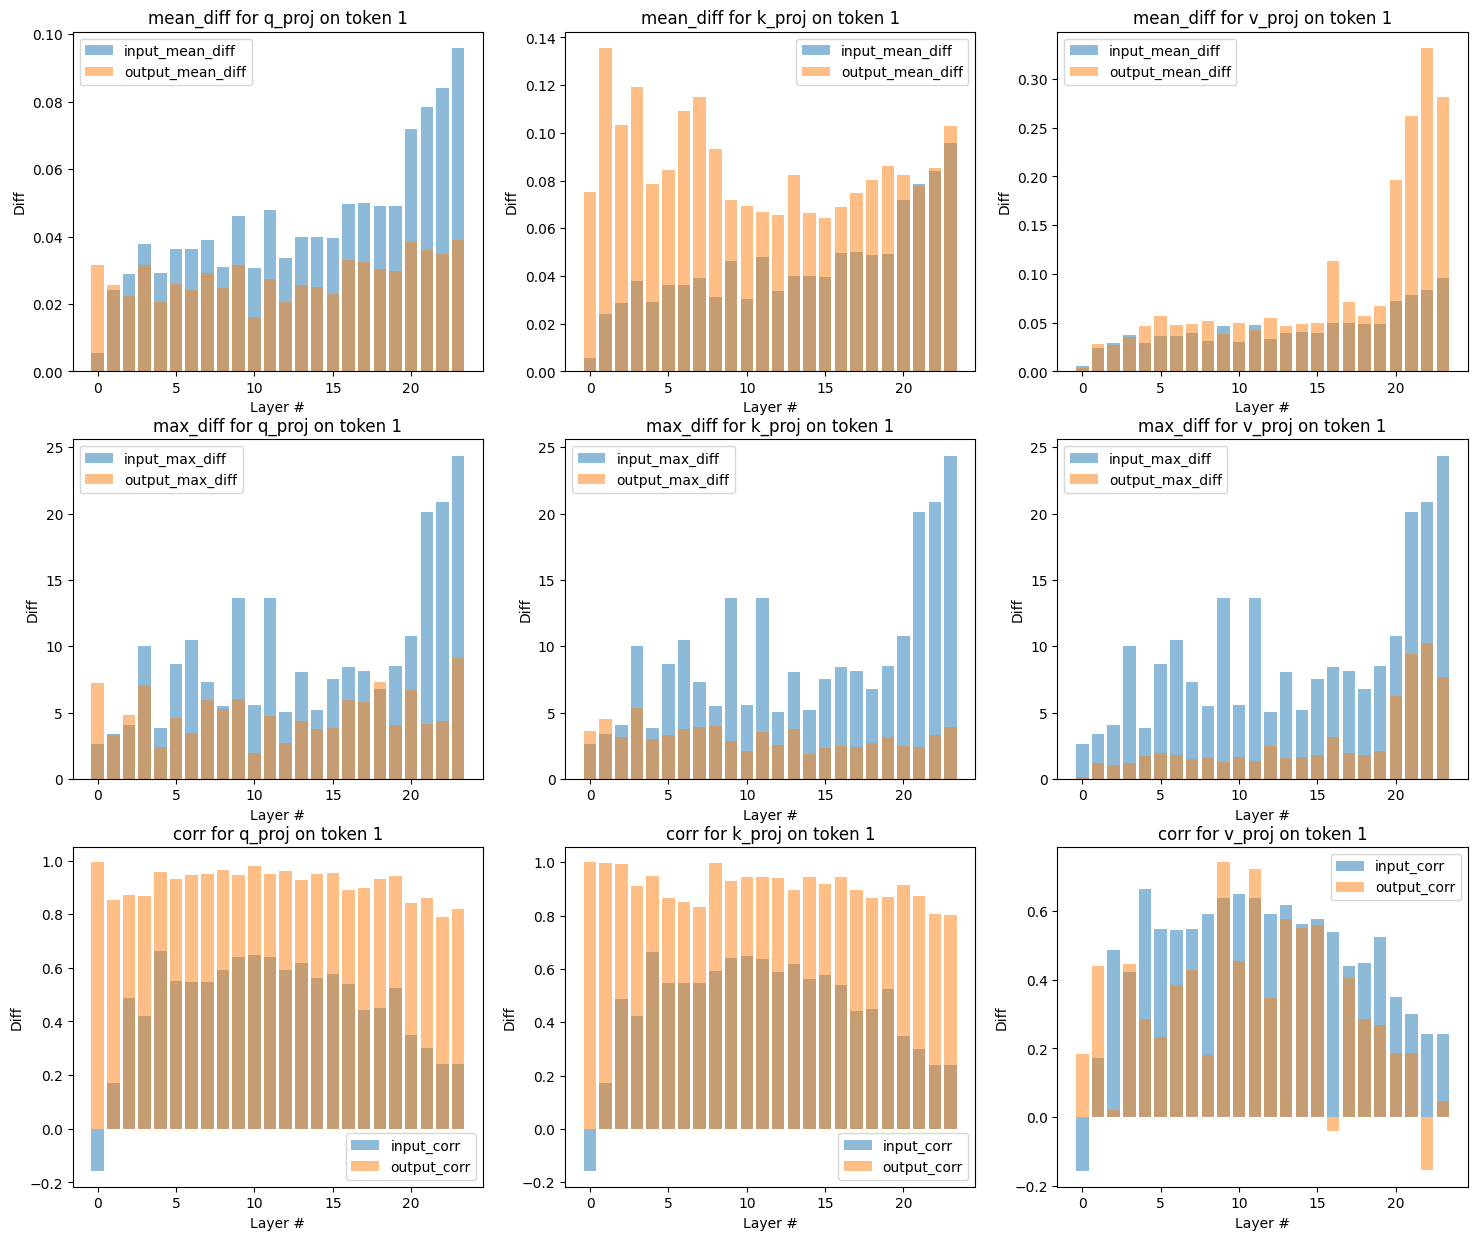

2


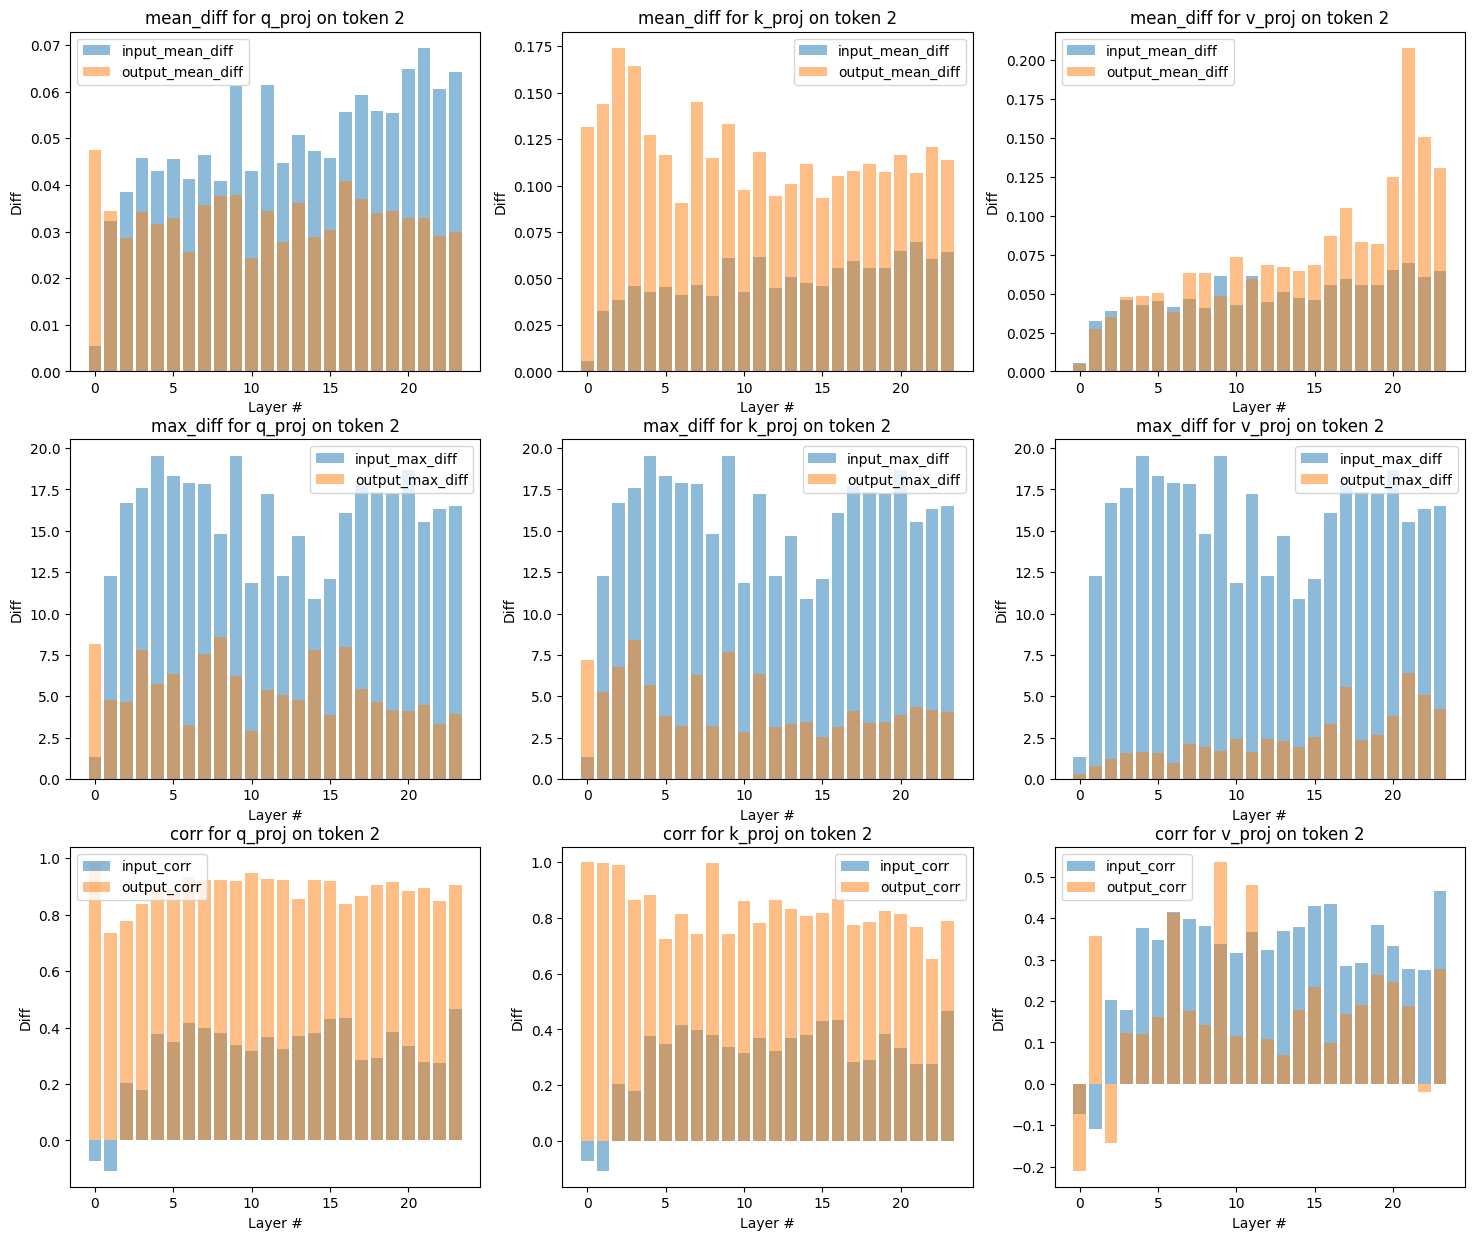

3


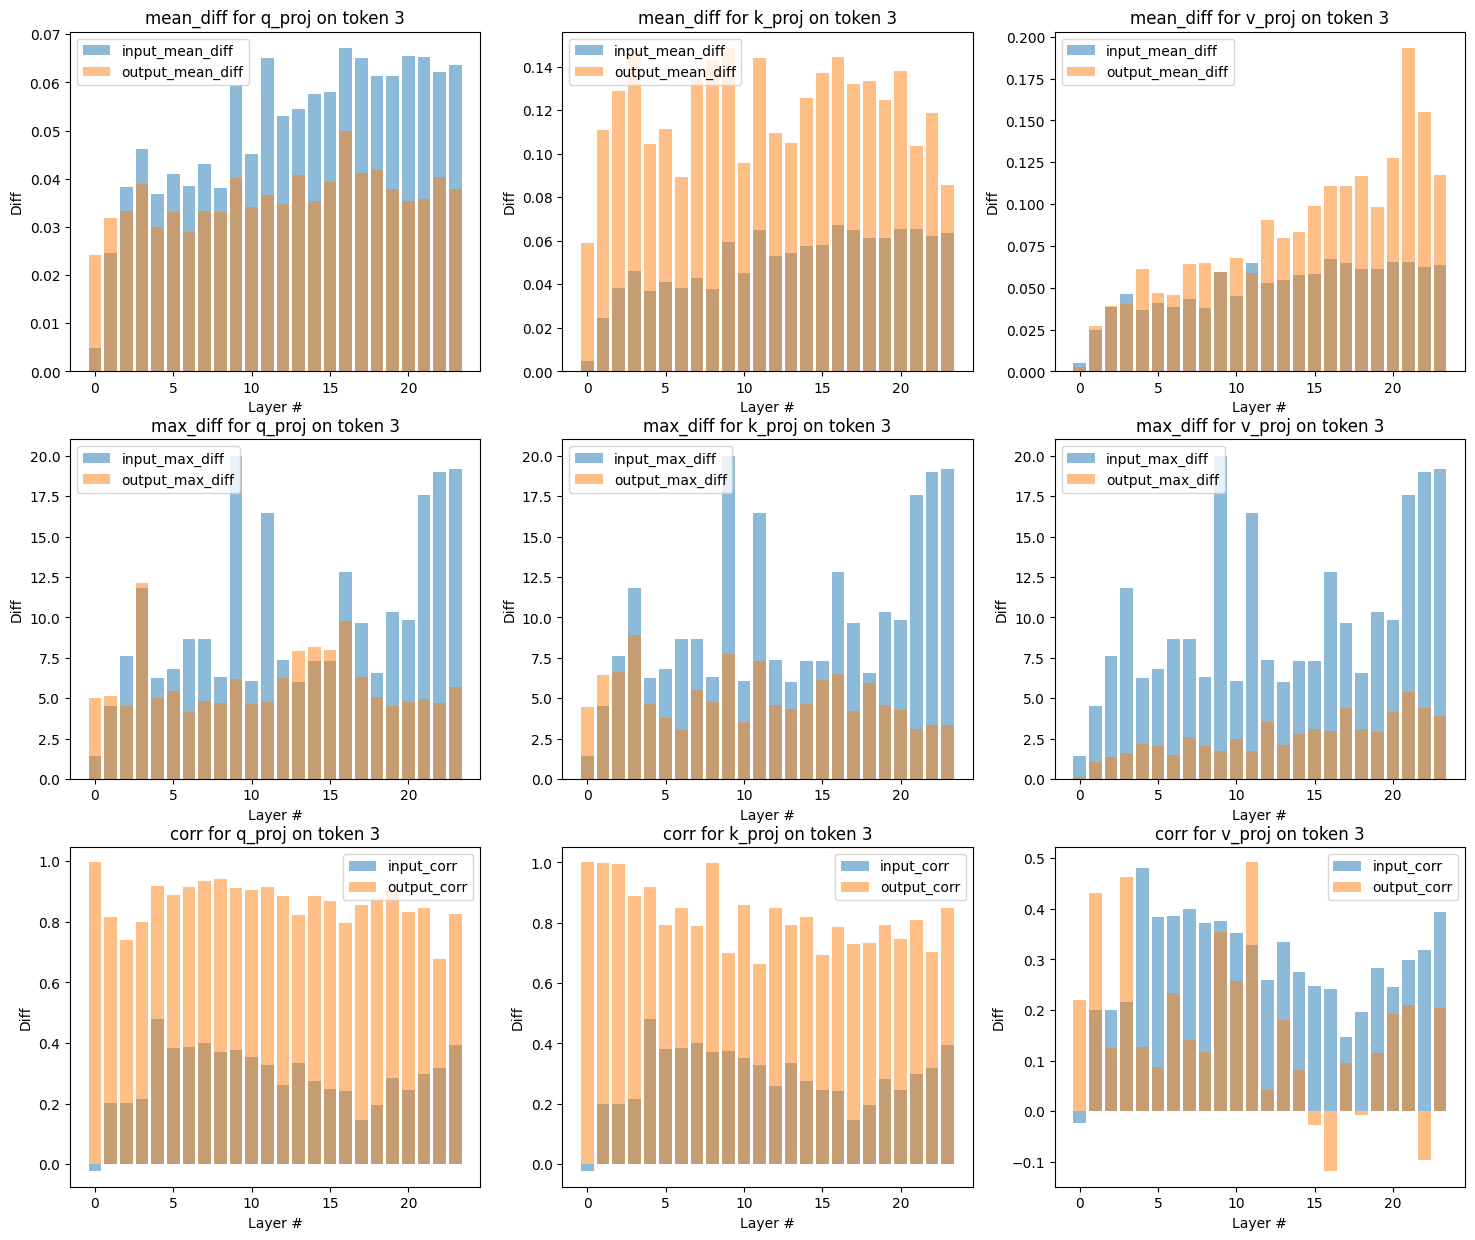

4


In [3]:
horizontal_comparison_of_forward_hook(
    hook_datas = None,
    hook_data_paths = [hook_data_path_1_2, hook_data_path_2_2],
    hook_module_names = forward_hook_module_names[:],
    hook_module_name_suffixes = ["q_proj", "k_proj", "v_proj"],
    comparison_index = ["mean_diff", "max_diff", "corr"],
    max_length = 4,
)

0


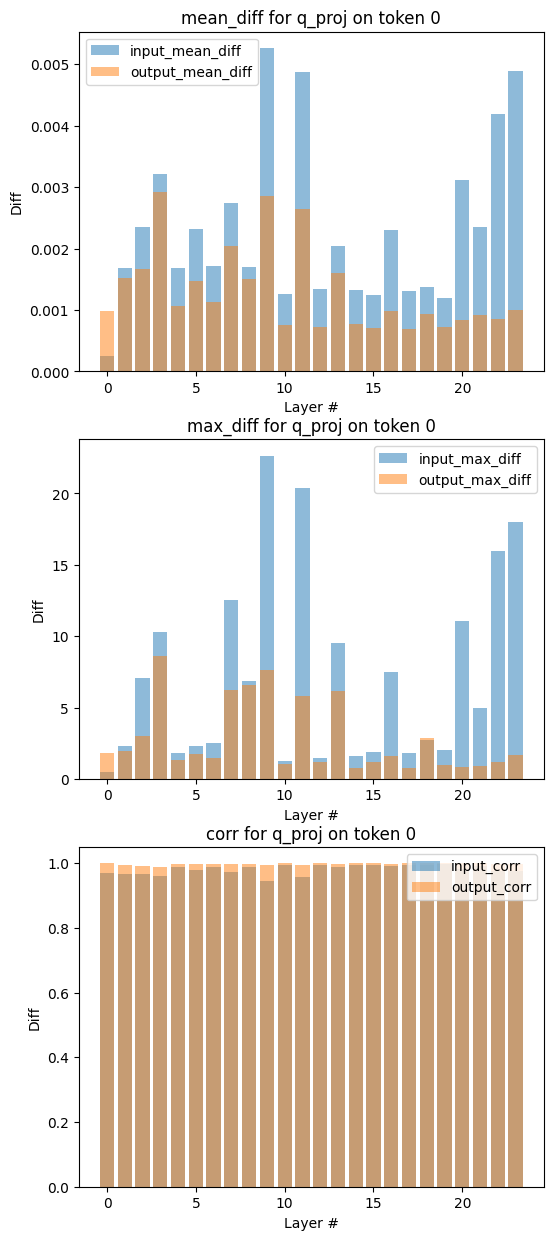

1


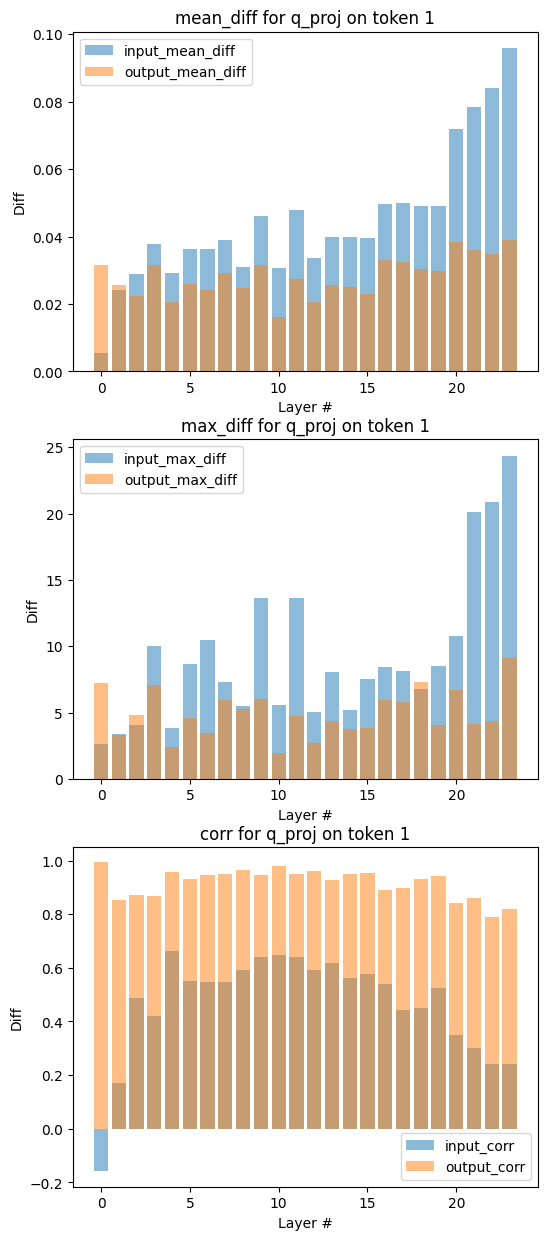

2


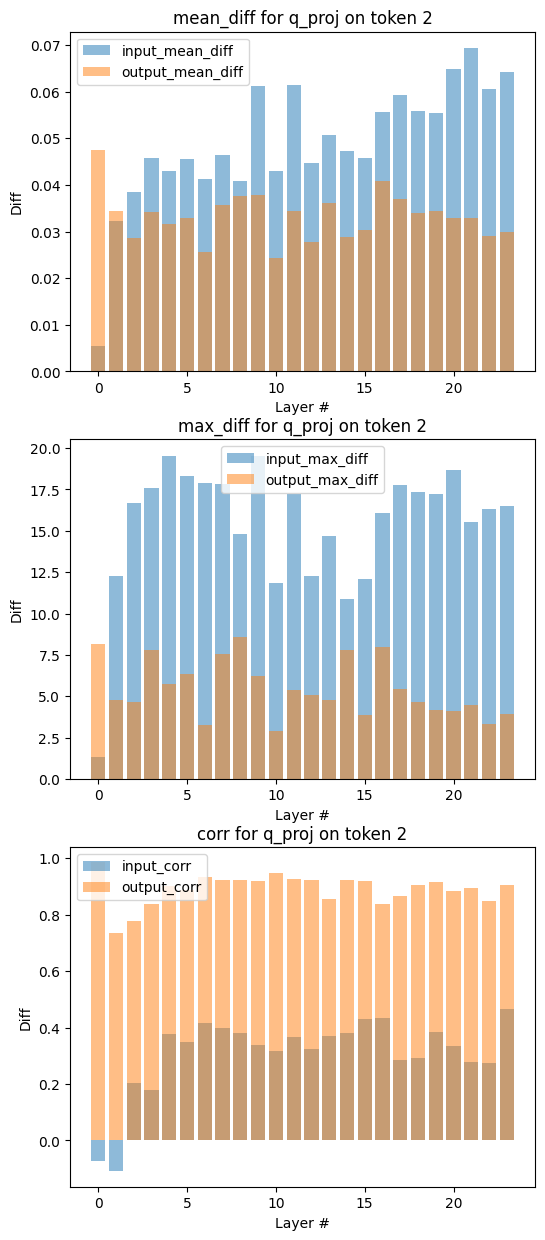

3


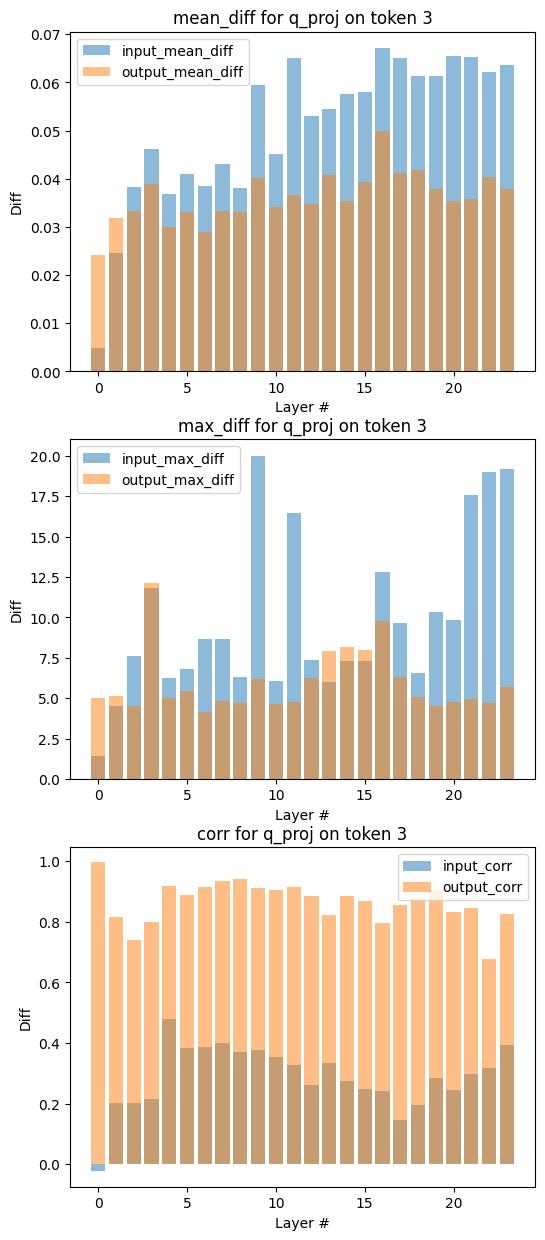

4


In [4]:
horizontal_comparison_of_forward_hook(
    hook_datas = None,
    hook_data_paths = [hook_data_path_1_2, hook_data_path_2_2],
    hook_module_names = forward_hook_module_names[:],
    hook_module_name_suffixes = ["q_proj"],
    comparison_index = ["mean_diff", "max_diff", "corr"],
    max_length = 4,
)

0


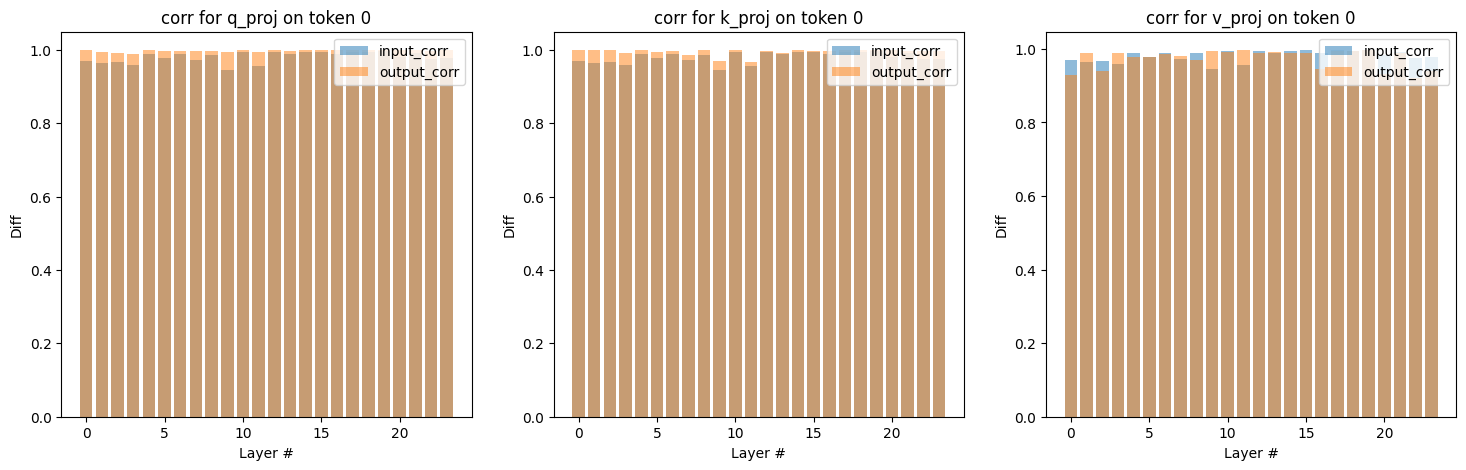

1


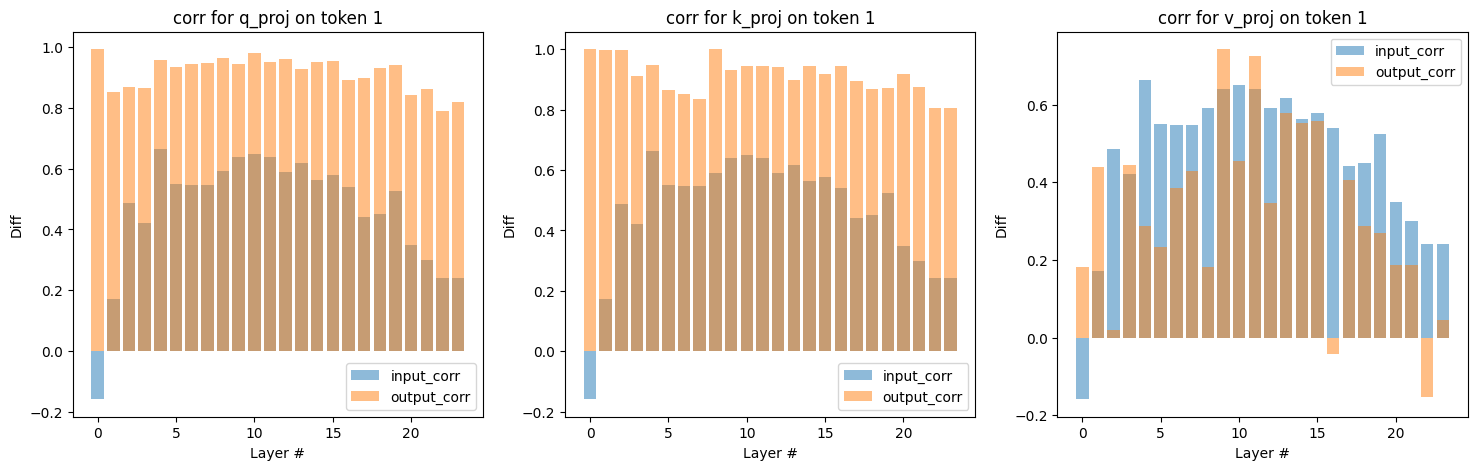

2


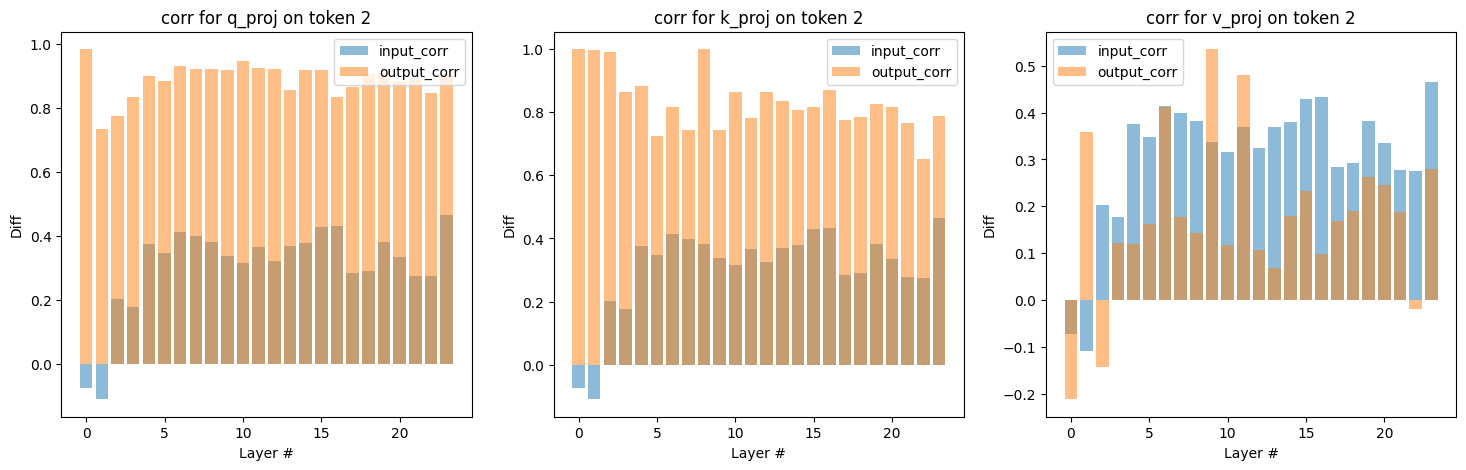

3


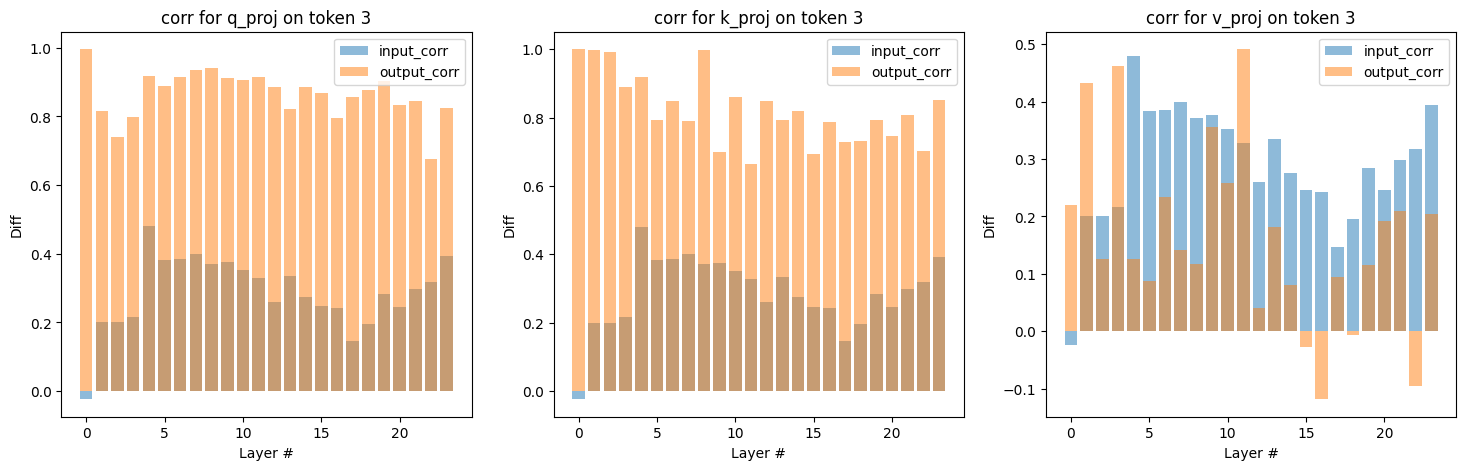

4


In [5]:
horizontal_comparison_of_forward_hook(
    hook_datas = None,
    hook_data_paths = [hook_data_path_1_2, hook_data_path_2_2],
    hook_module_names = forward_hook_module_names[:],
    hook_module_name_suffixes = ["q_proj", "k_proj", "v_proj"],
    comparison_index = ["corr"],
    max_length = 4,
)

0


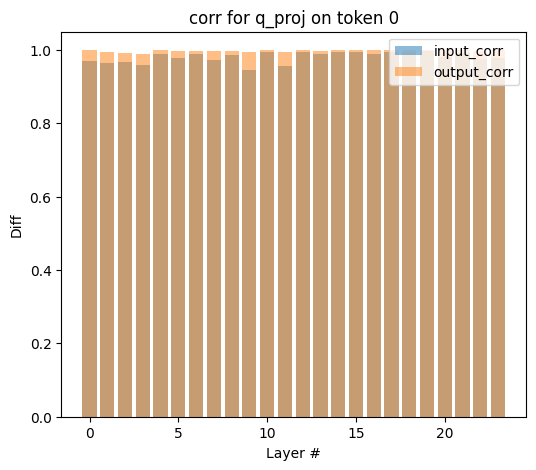

1


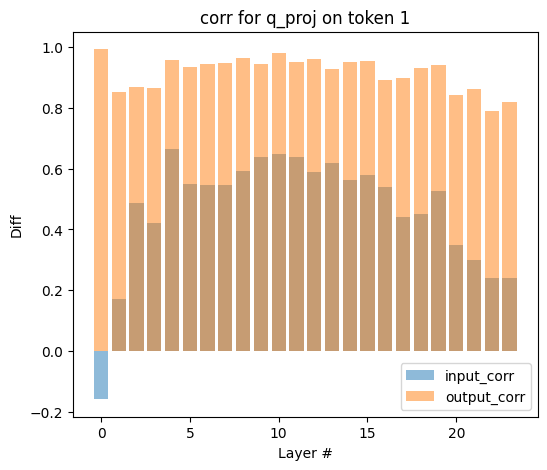

2


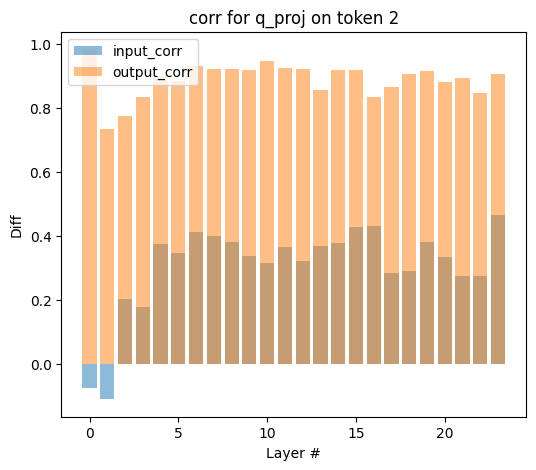

3


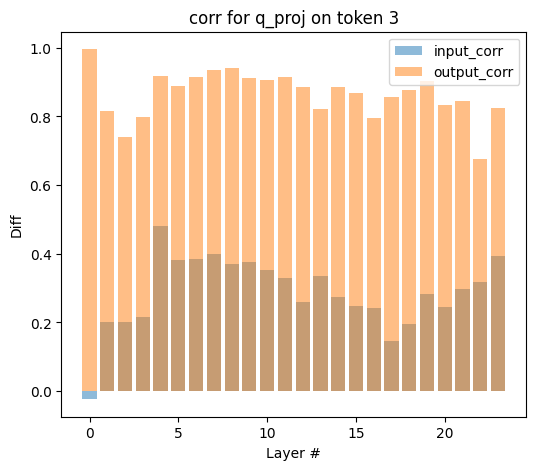

4


In [6]:
horizontal_comparison_of_forward_hook(
    hook_datas = None,
    hook_data_paths = [hook_data_path_1_2, hook_data_path_2_2],
    hook_module_names = forward_hook_module_names[:],
    hook_module_name_suffixes = ["q_proj"],
    comparison_index = ["corr"],
    max_length = 4,
)

# 测试 vertical_comparison_of_forward_hook

In [2]:
hook_data_paths = [
    r"./results/strawberry-X-4/fhook+Qwen2.5-0.5B-Instruct+True-0.pt",
    r"./results/longlong-1/fhook+Qwen2.5-0.5B-Instruct+True-0.pt",
    r"./results/prime-1/fhook+Qwen2.5-0.5B-Instruct+True-0.pt",
    r"./results/table-1/fhook+Qwen2.5-0.5B-Instruct+True-1.pt",
    r"./results/strawberry-X-3/fhook+DeepSeek-R1-Distill-Qwen-1.5B+True-0.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+False-0.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+False-1.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+False-2.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+False-3.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+True-0.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+True-1.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+True-2.pt",
    r"./results/selfattn-1/fhook+Qwen2.5-0.5B-Instruct+True-3.pt",
]

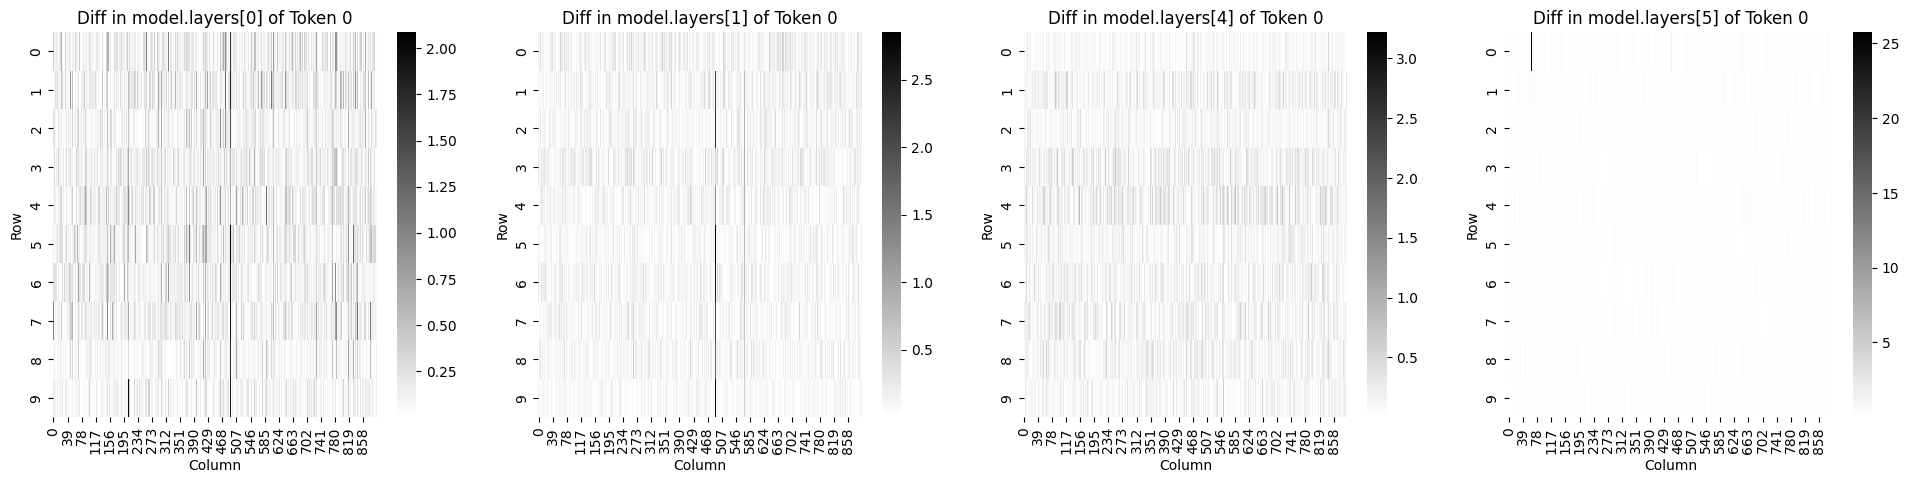

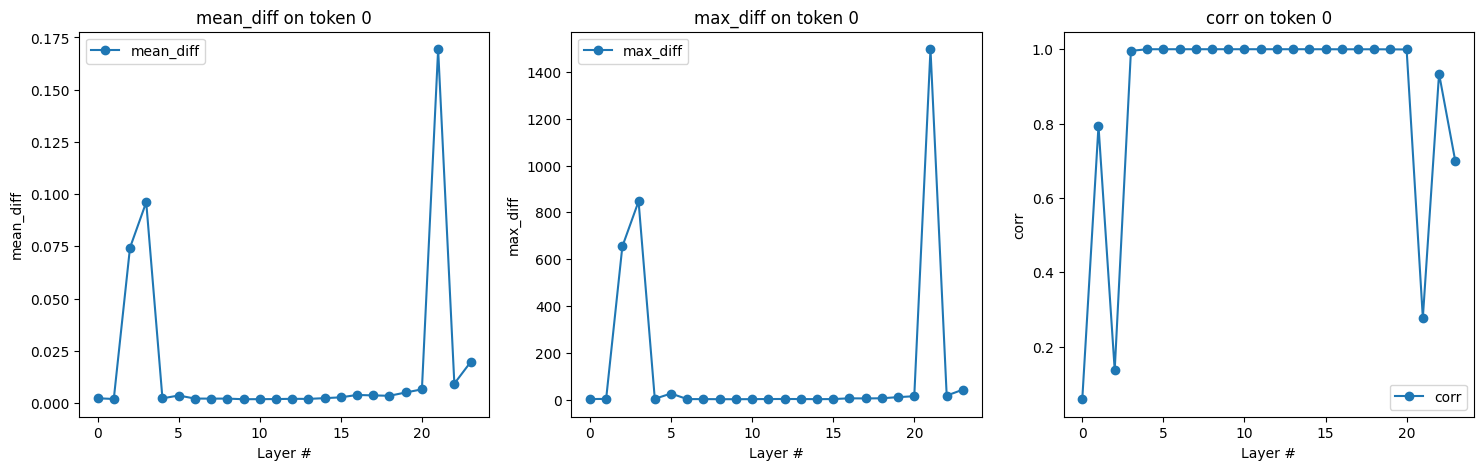

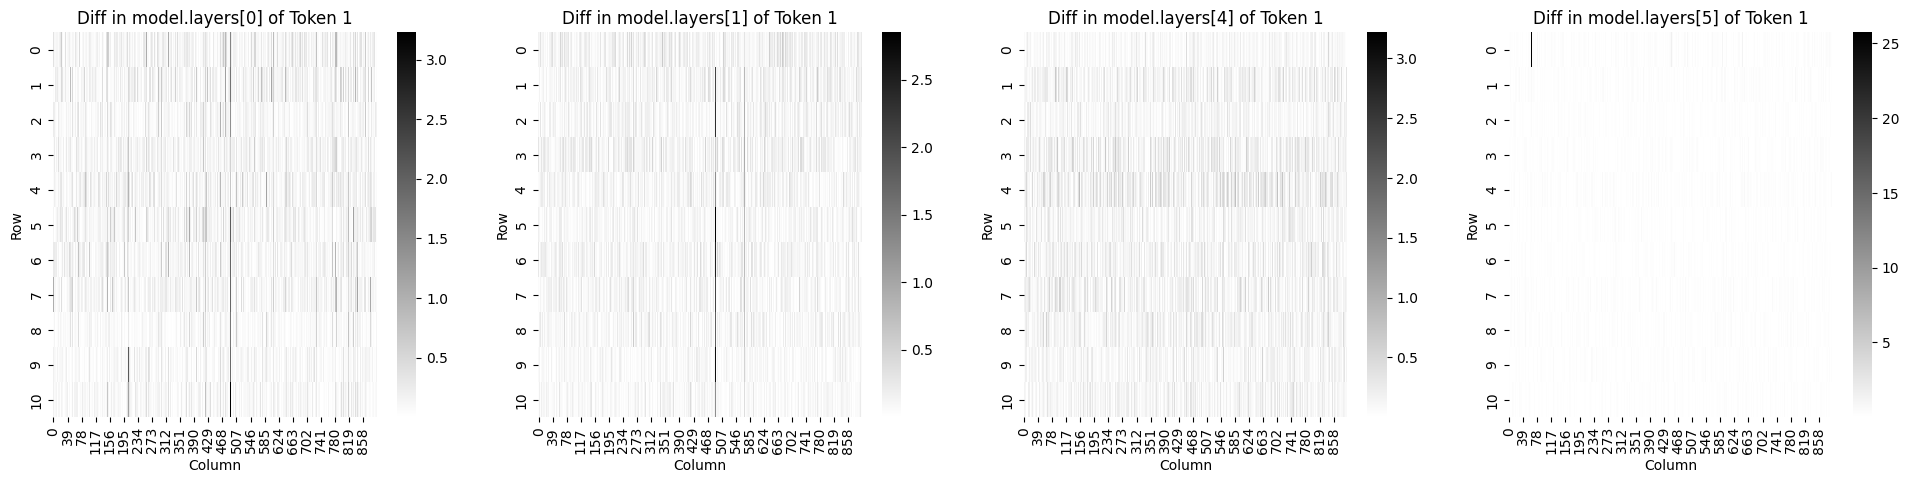

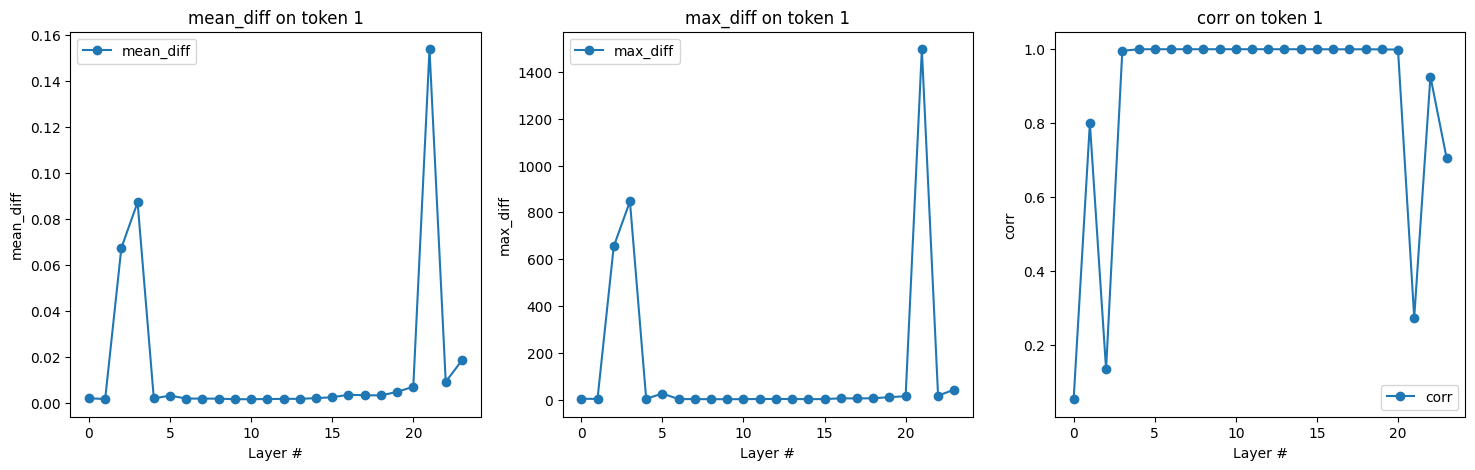

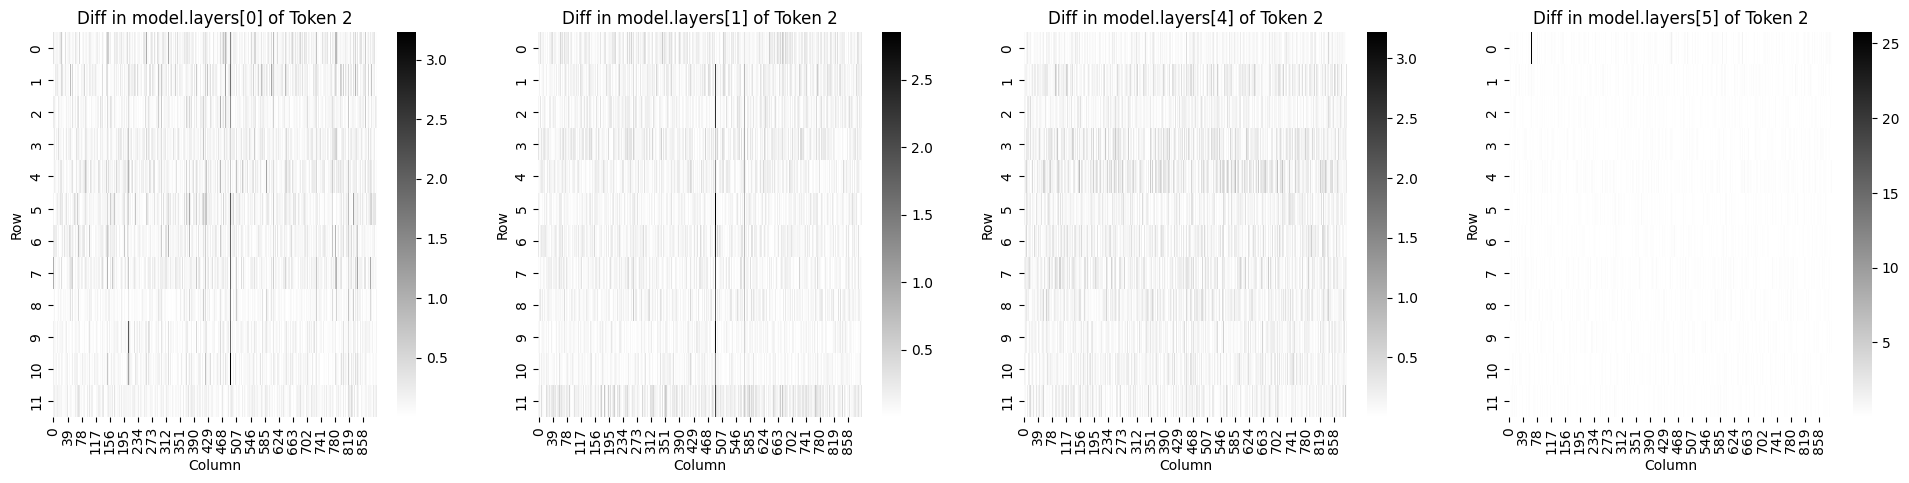

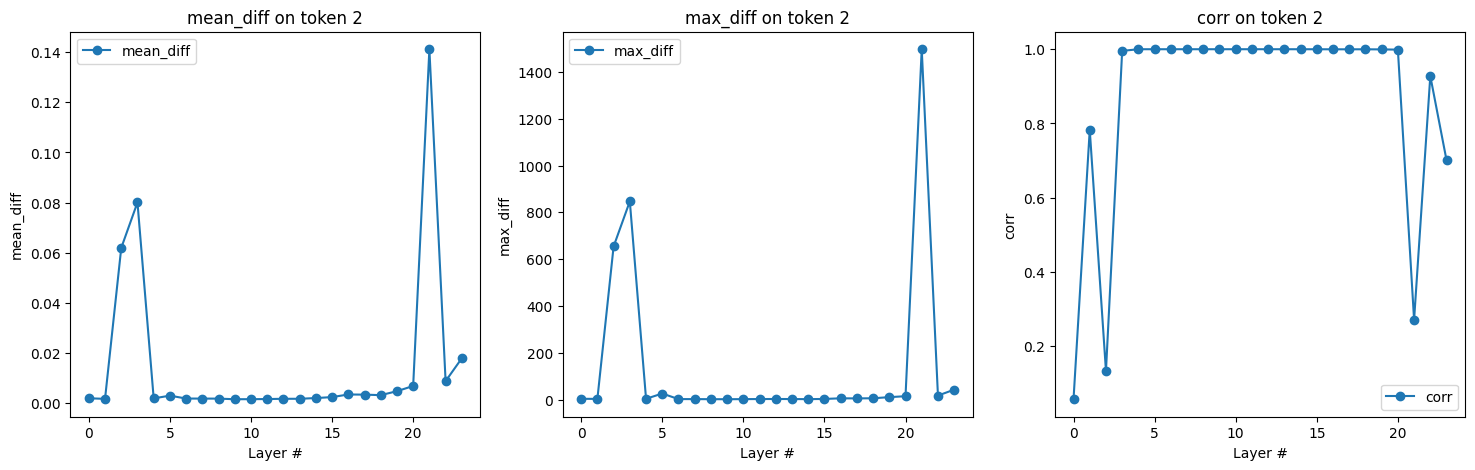

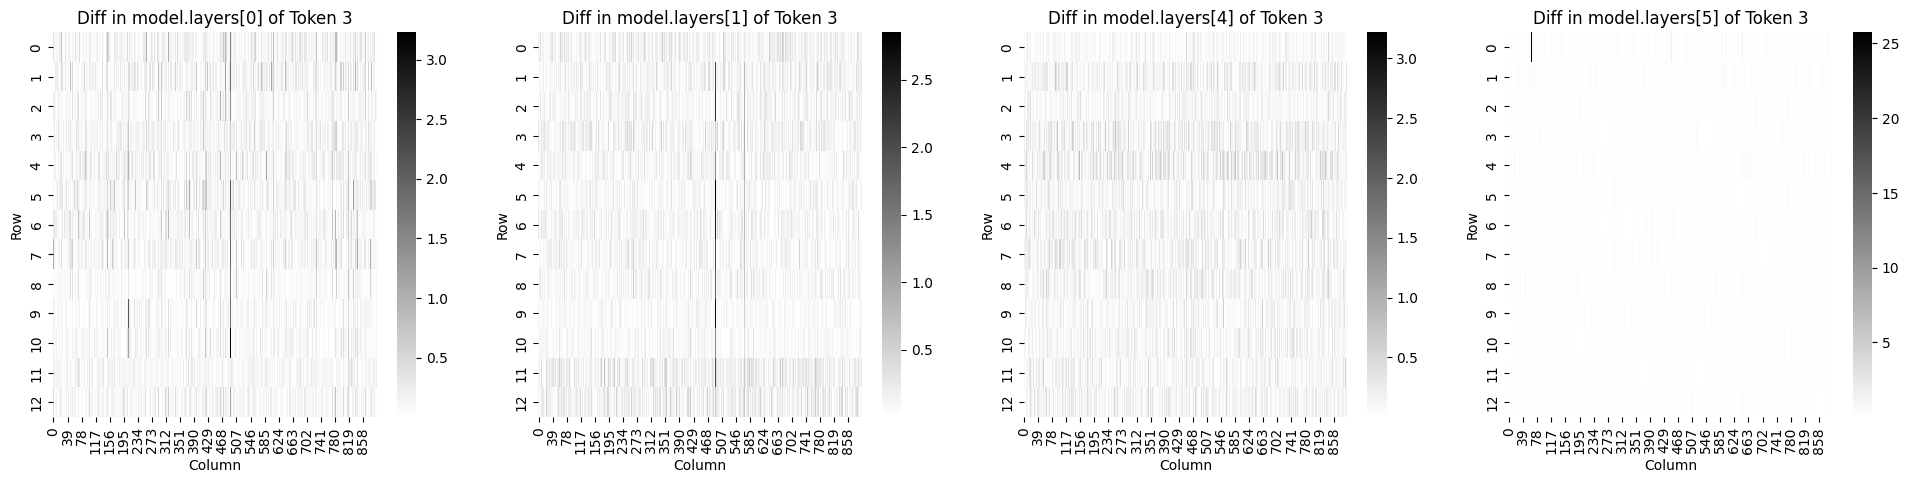

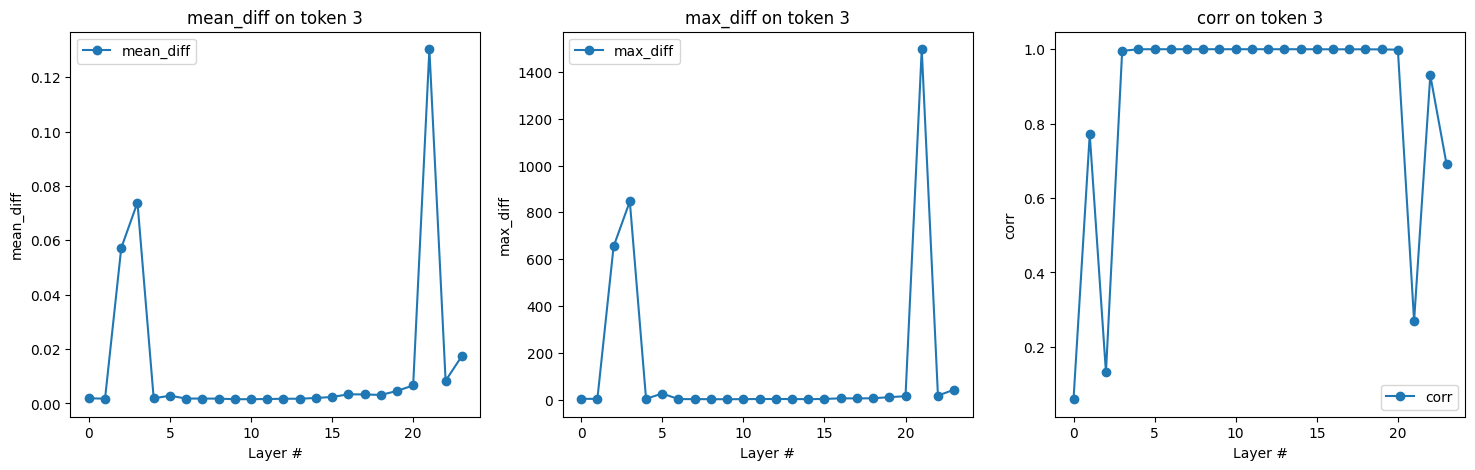

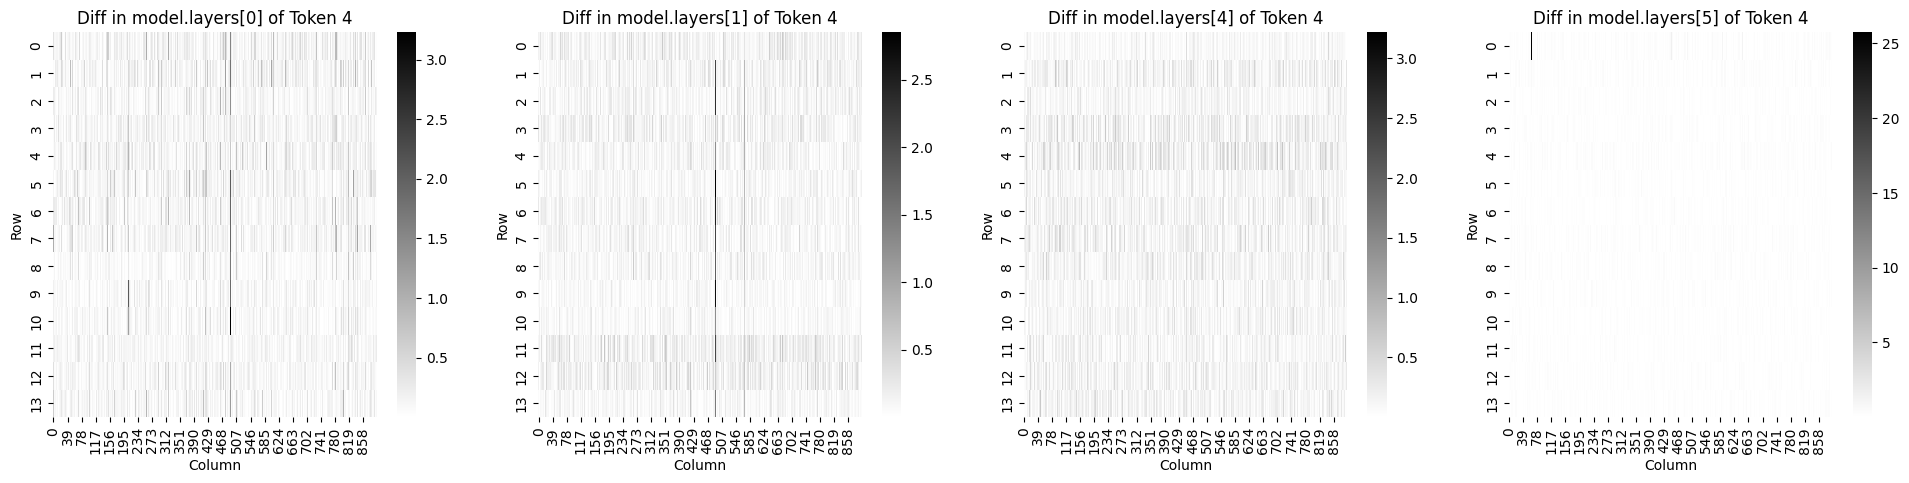

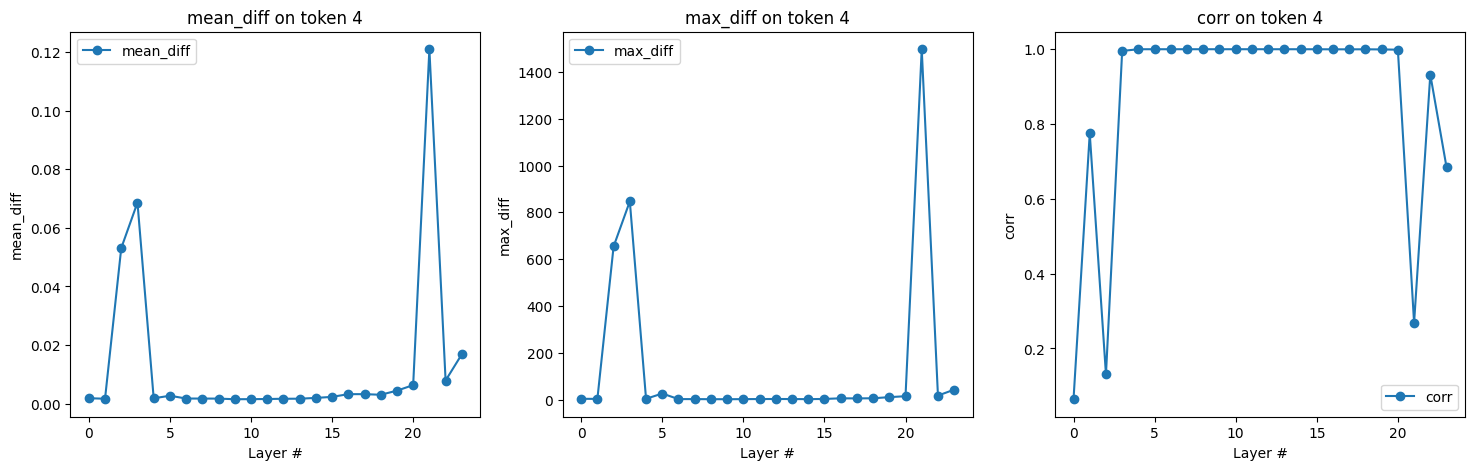

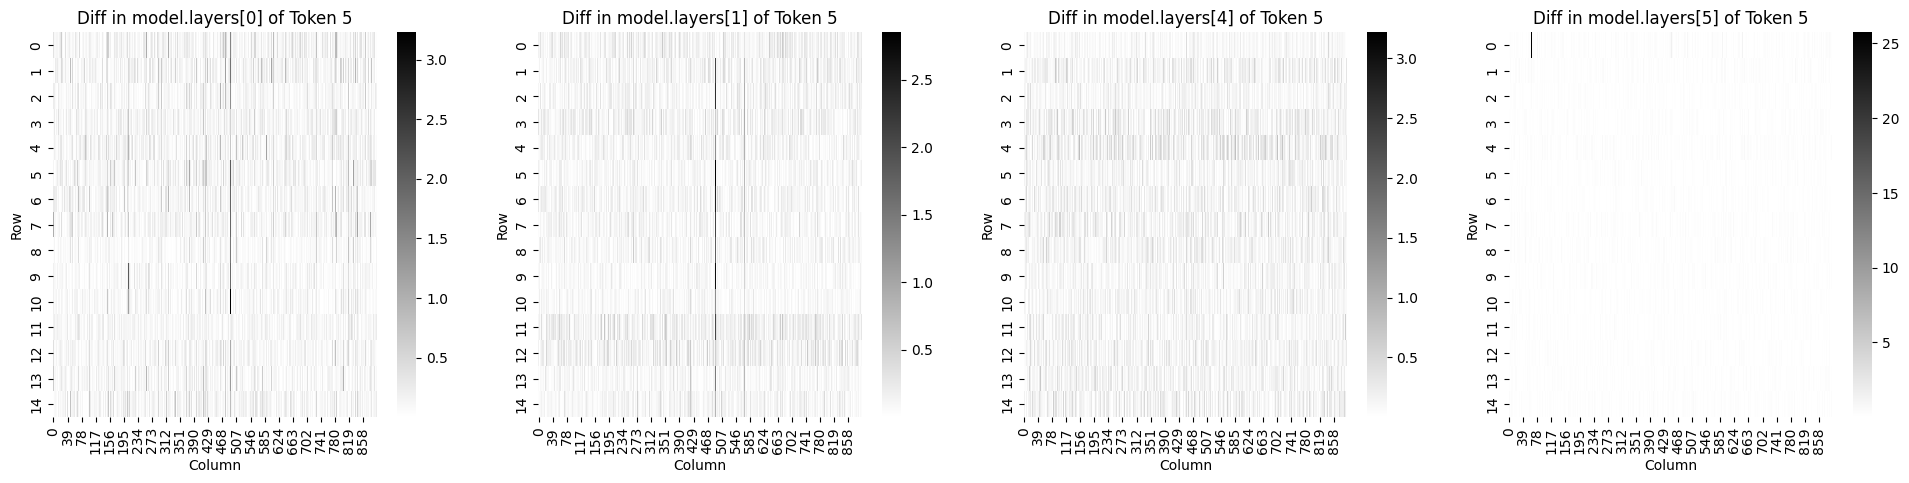

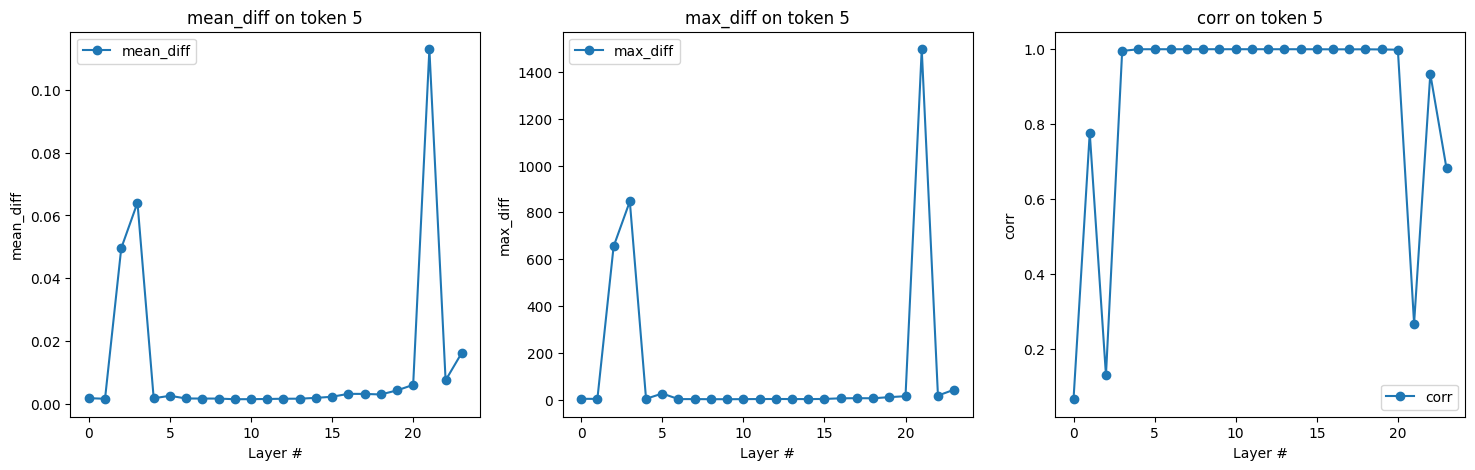

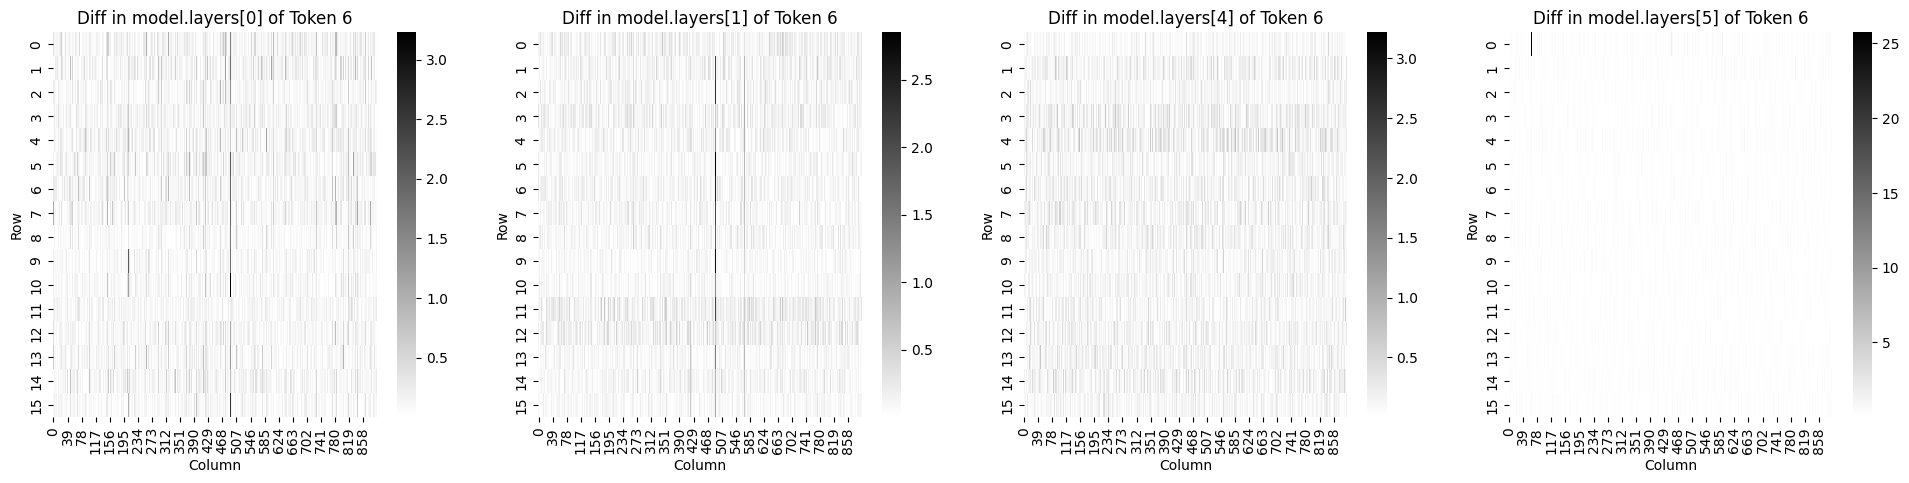

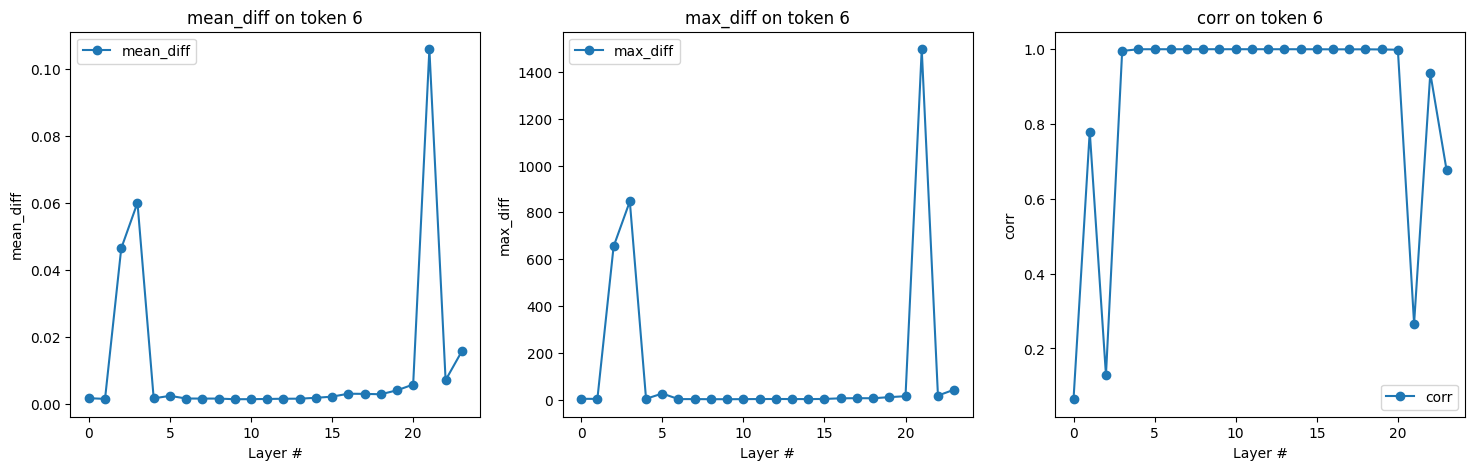

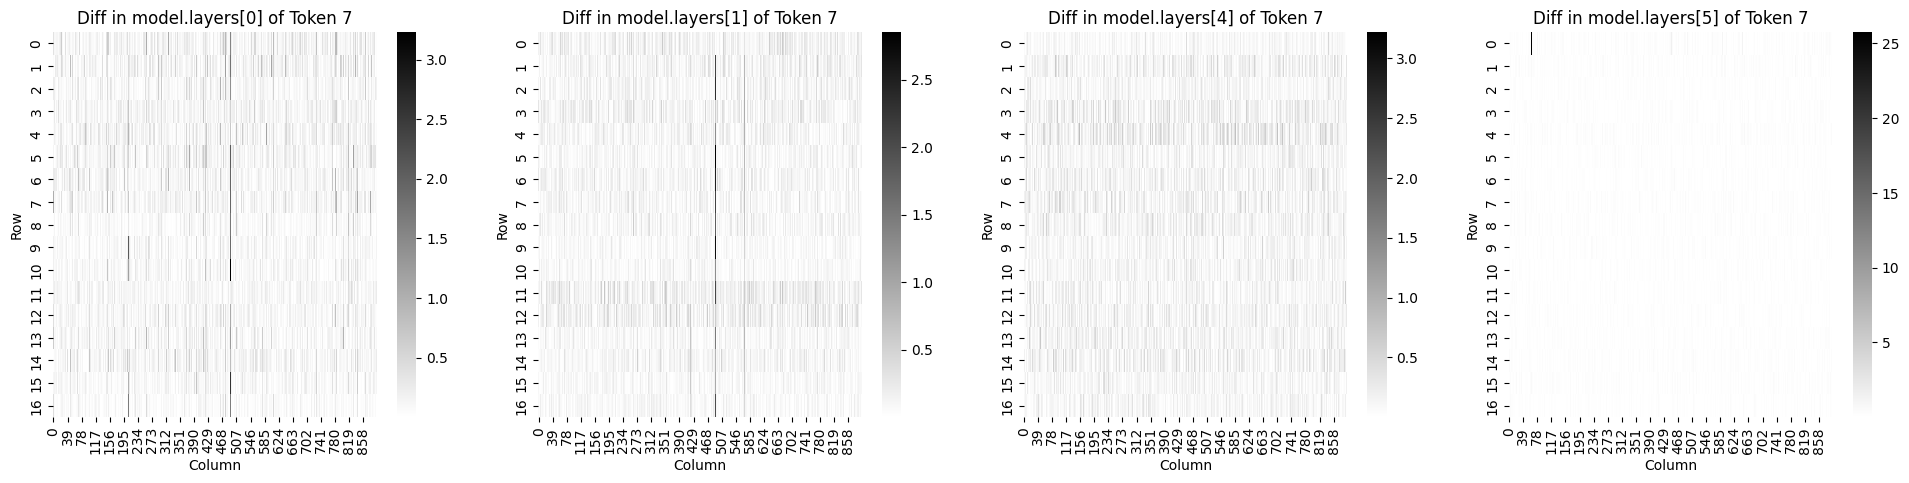

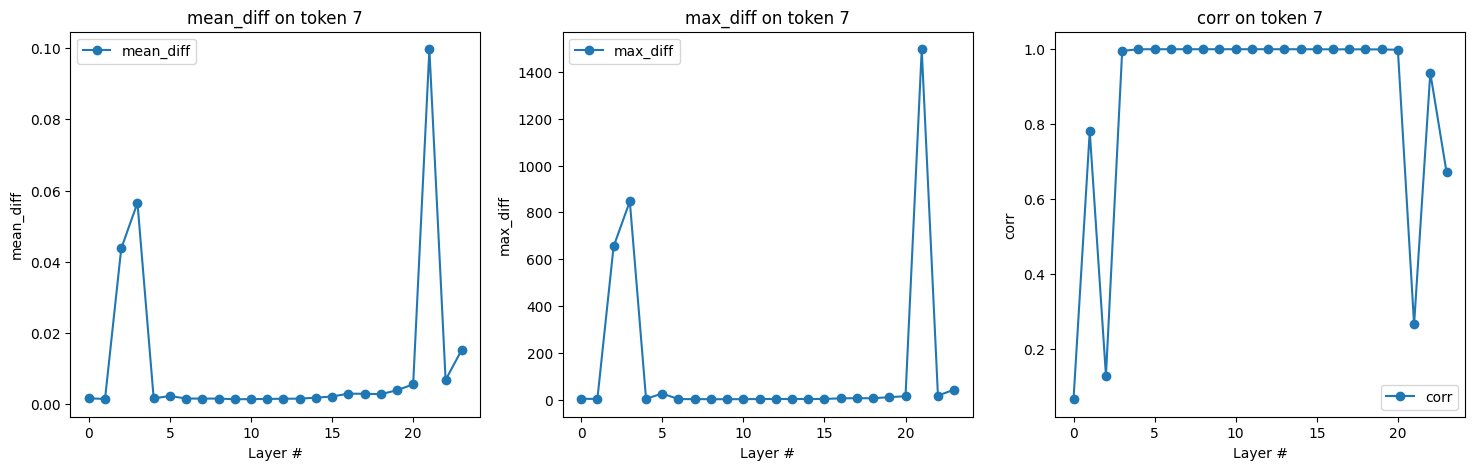

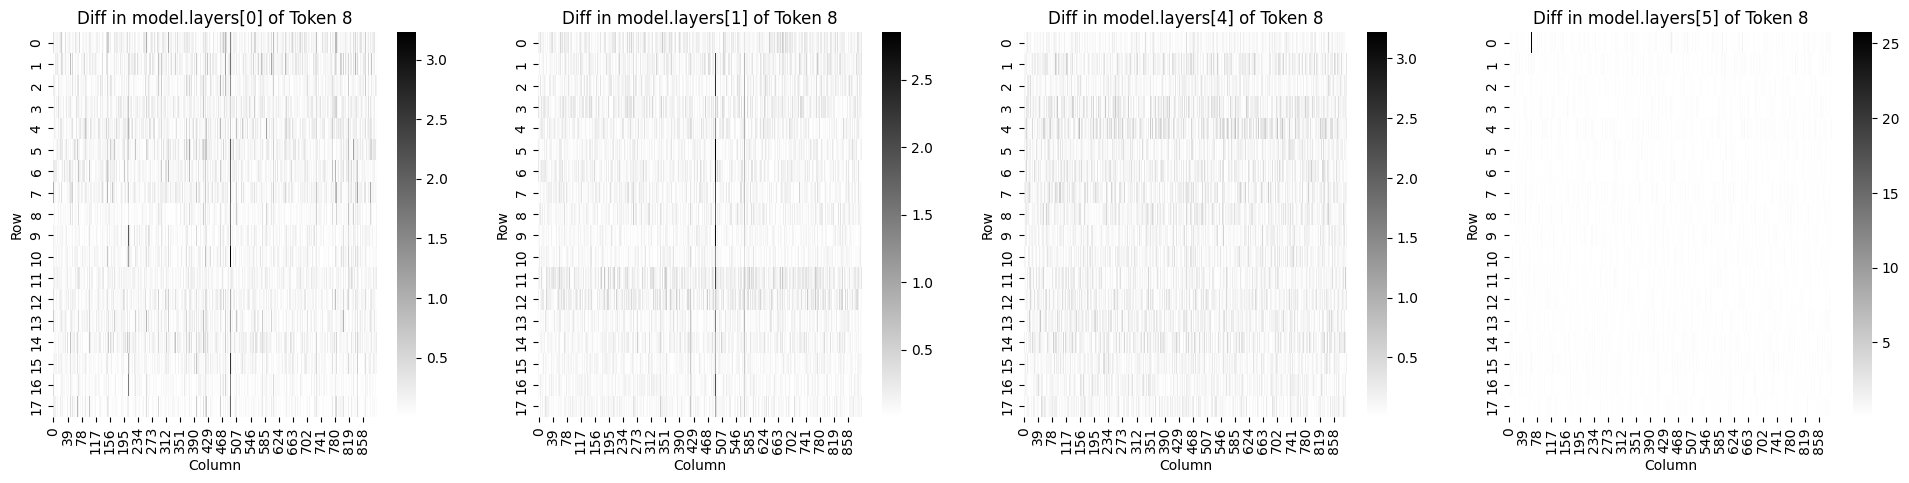

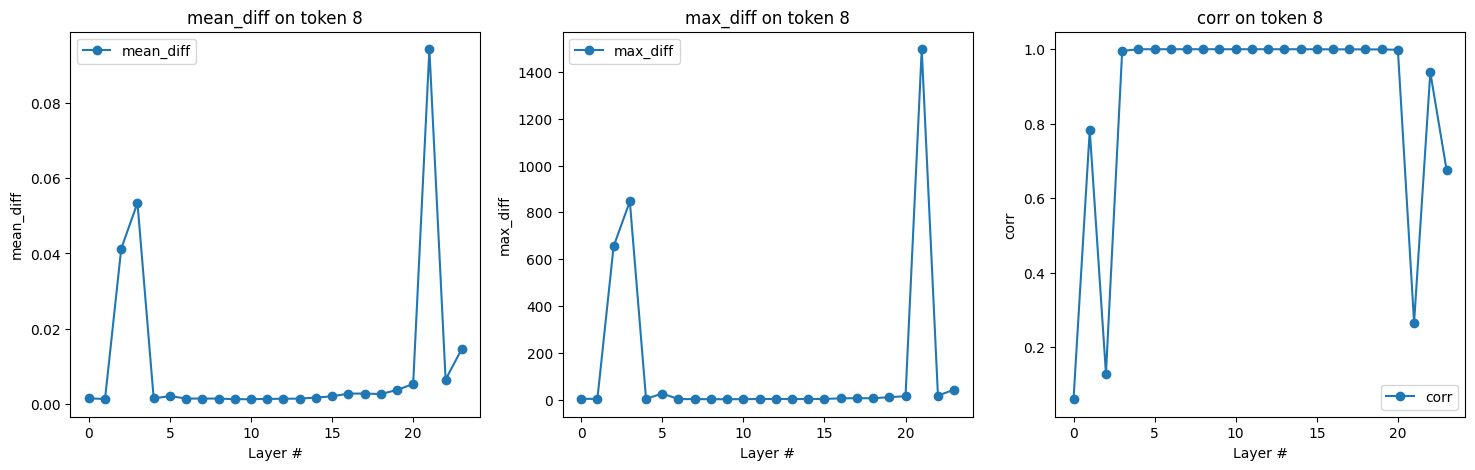

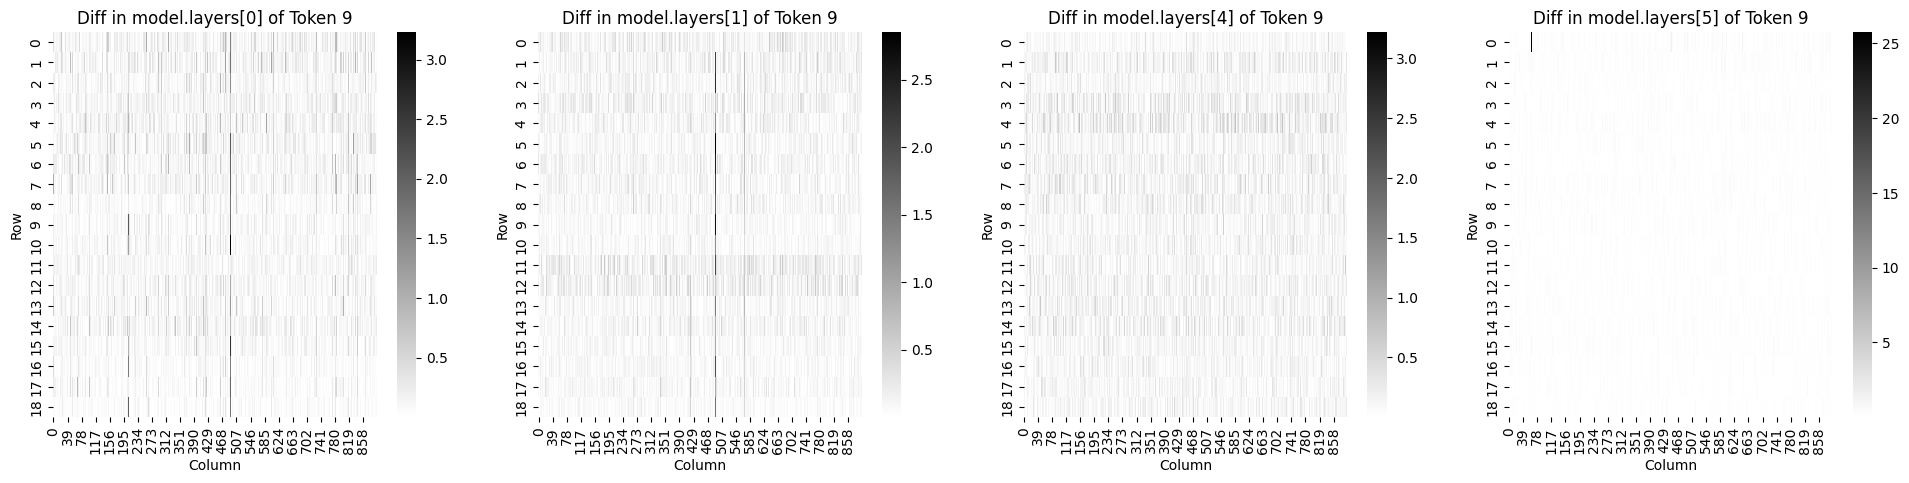

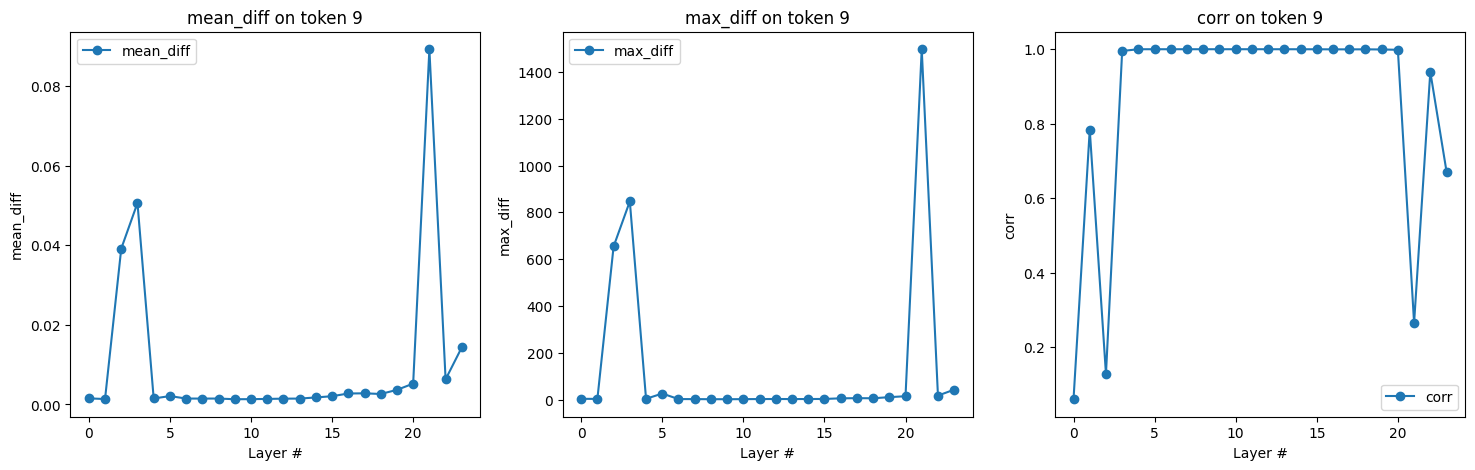

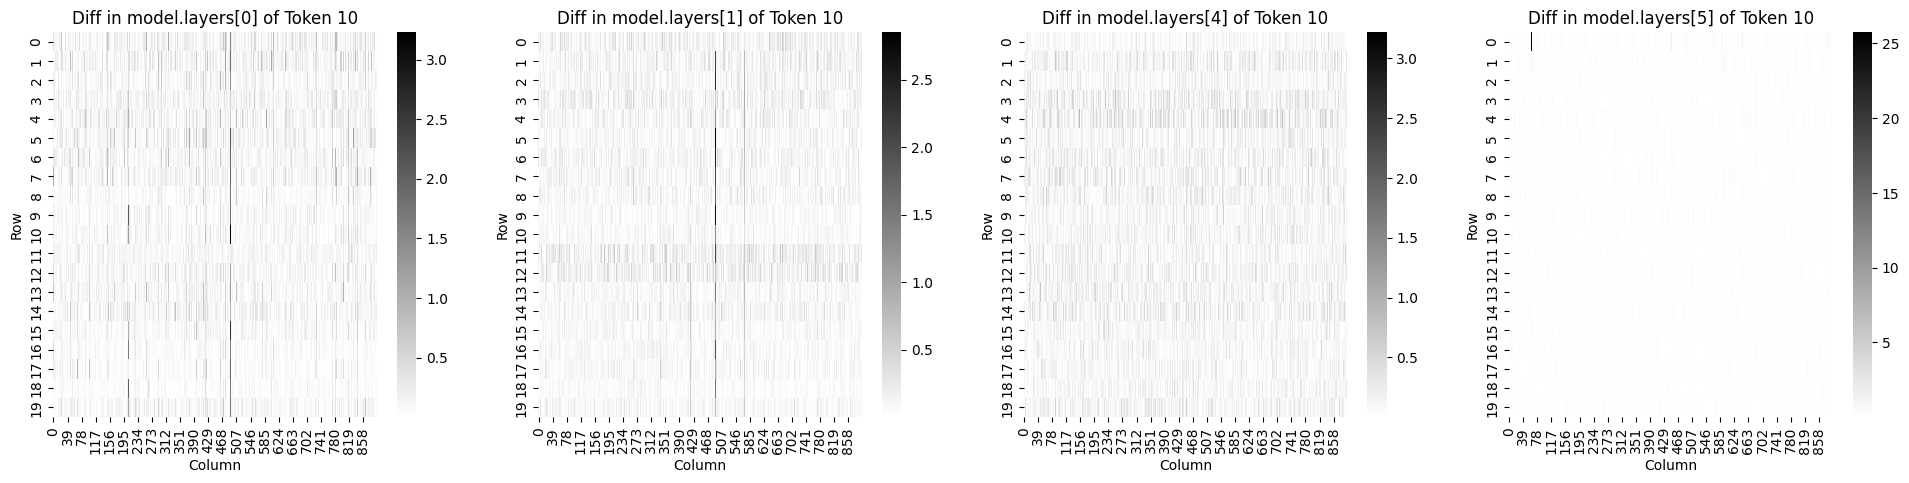

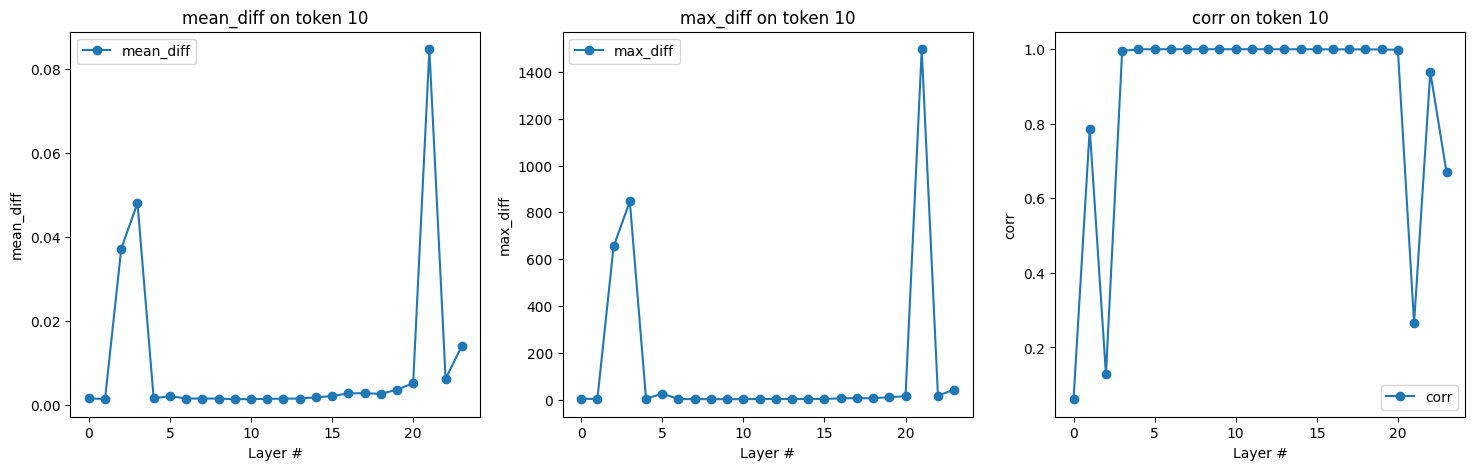

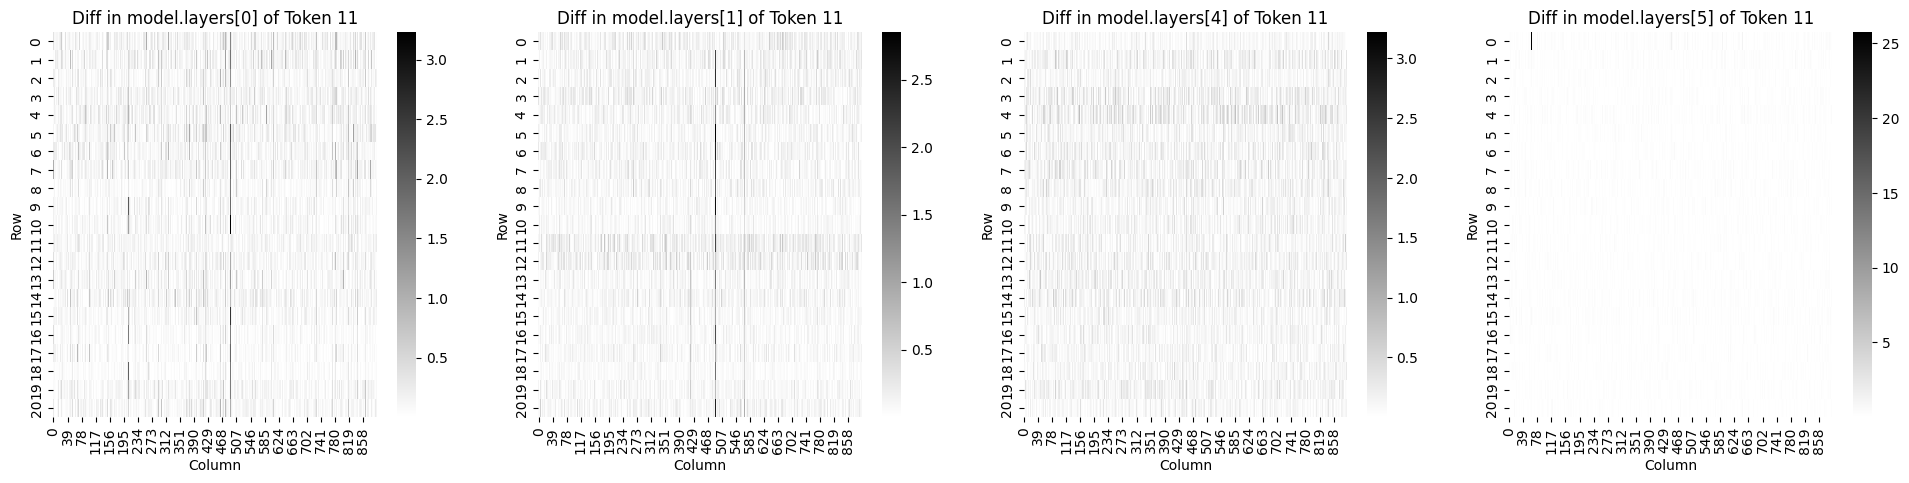

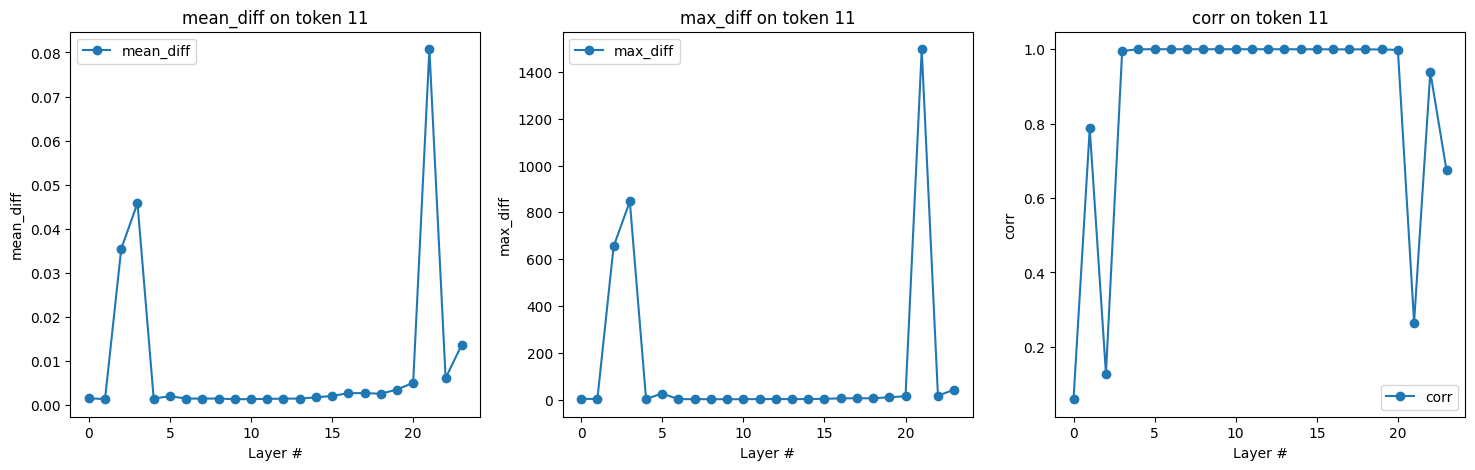

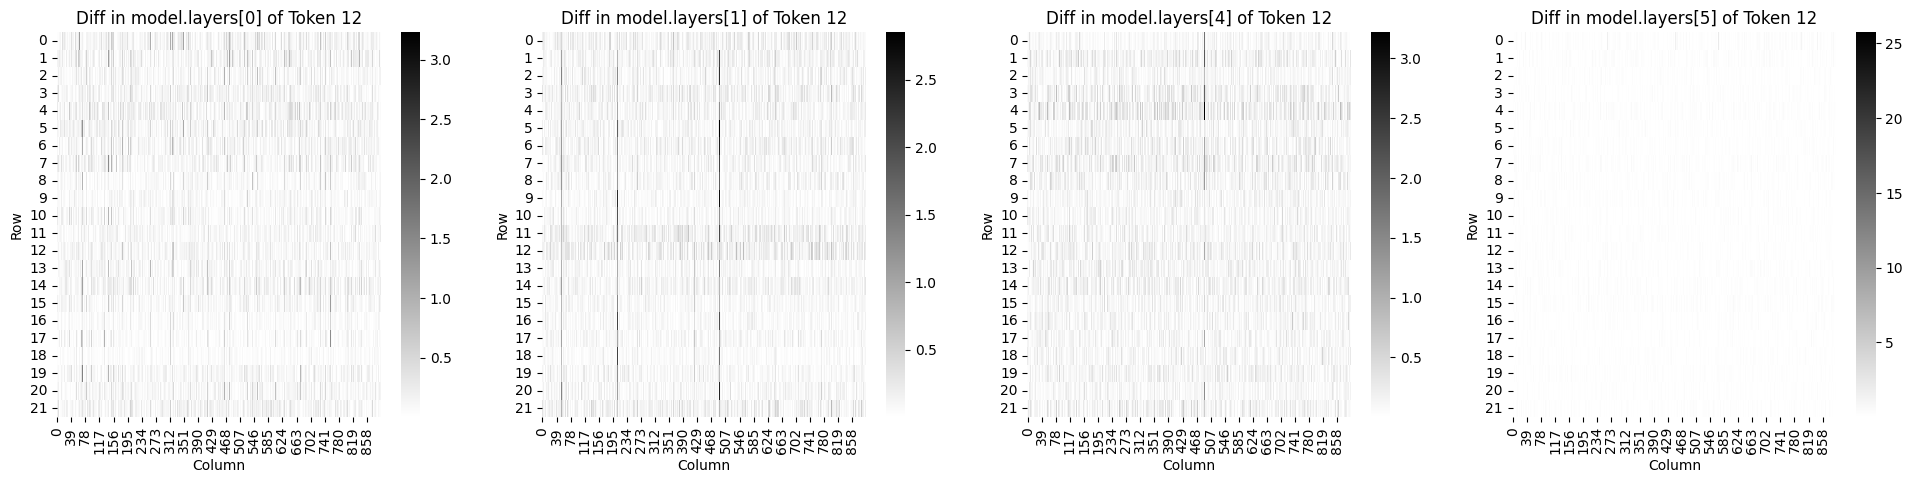

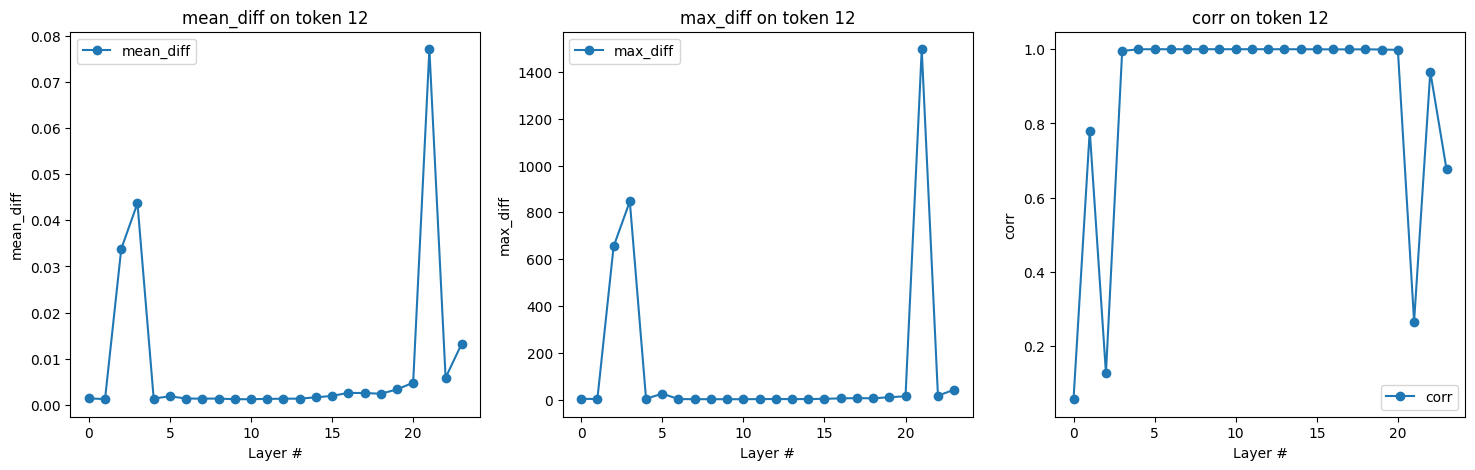

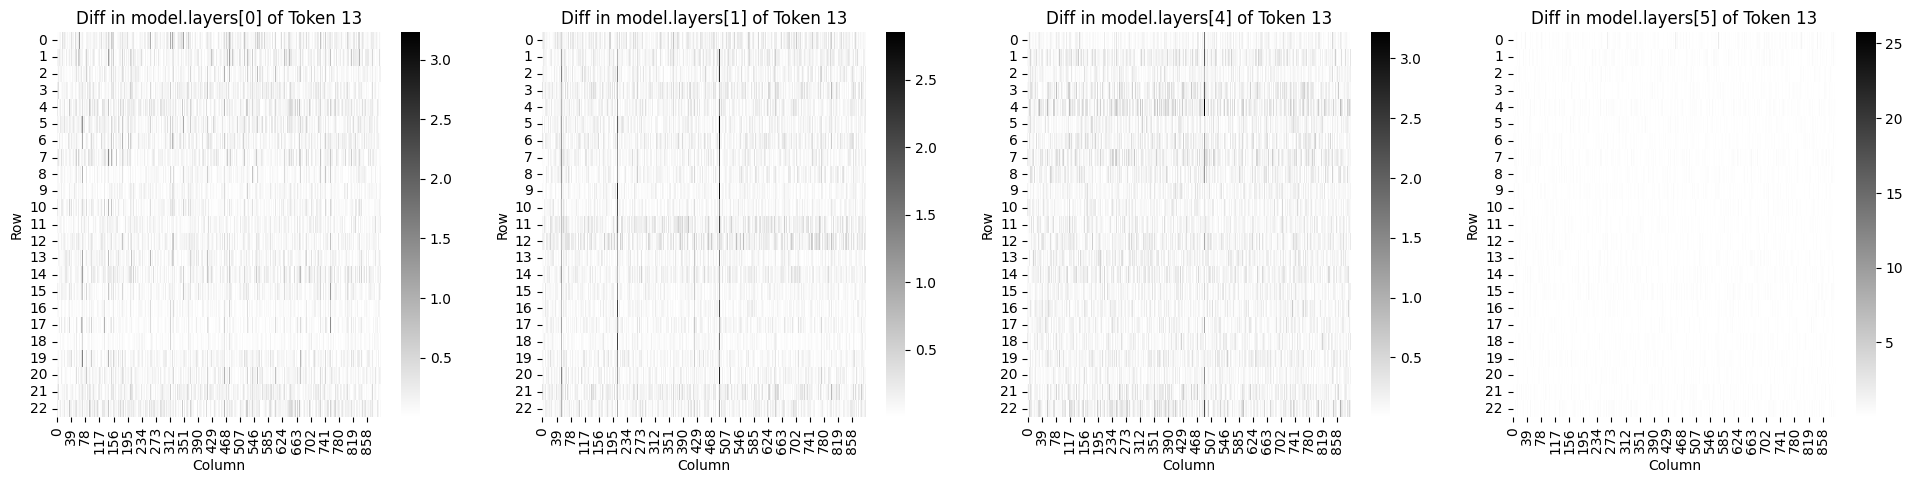

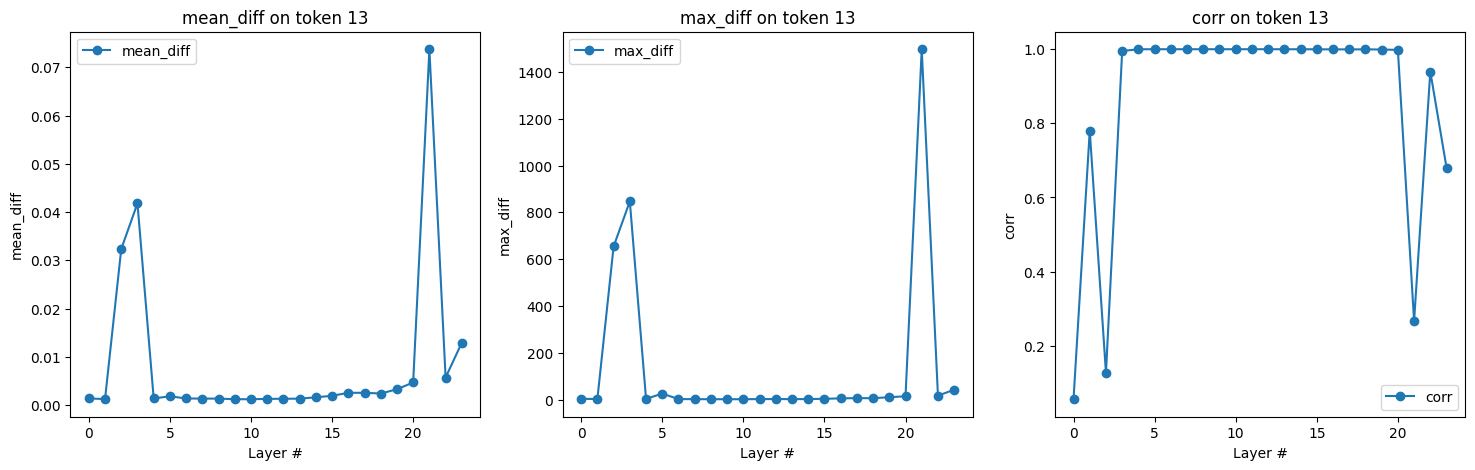

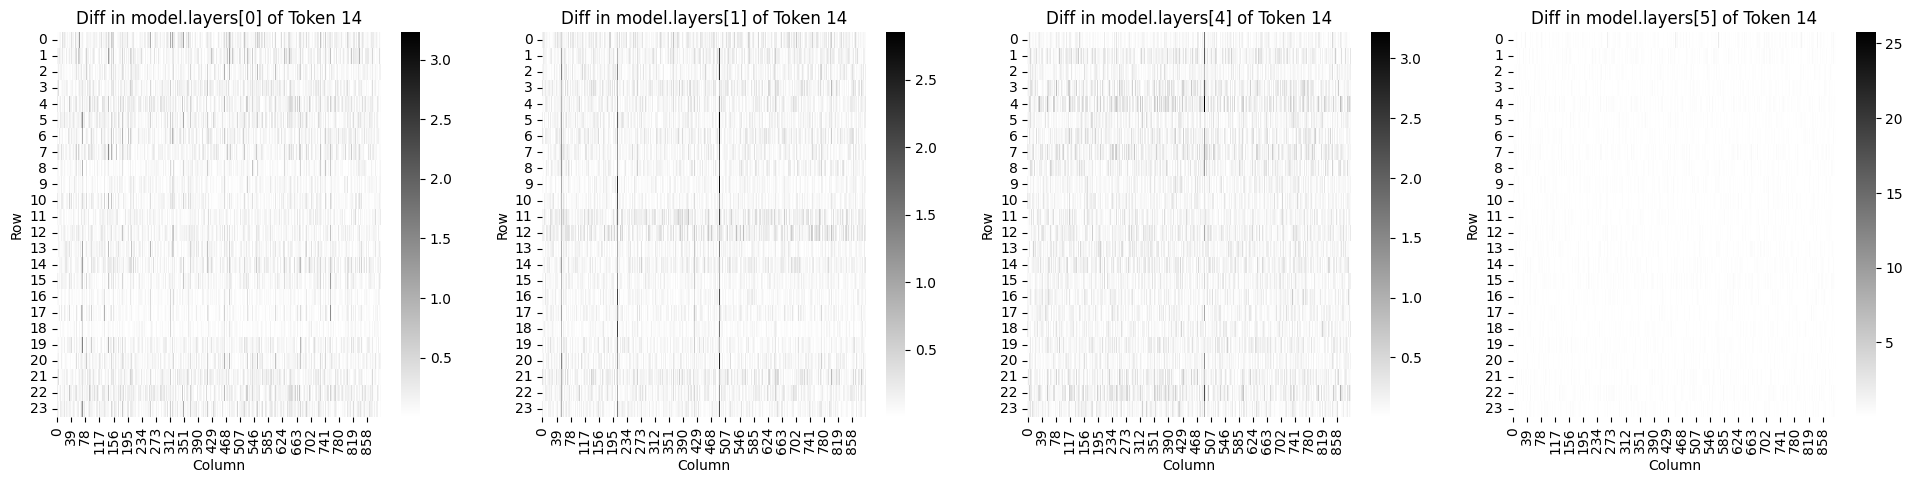

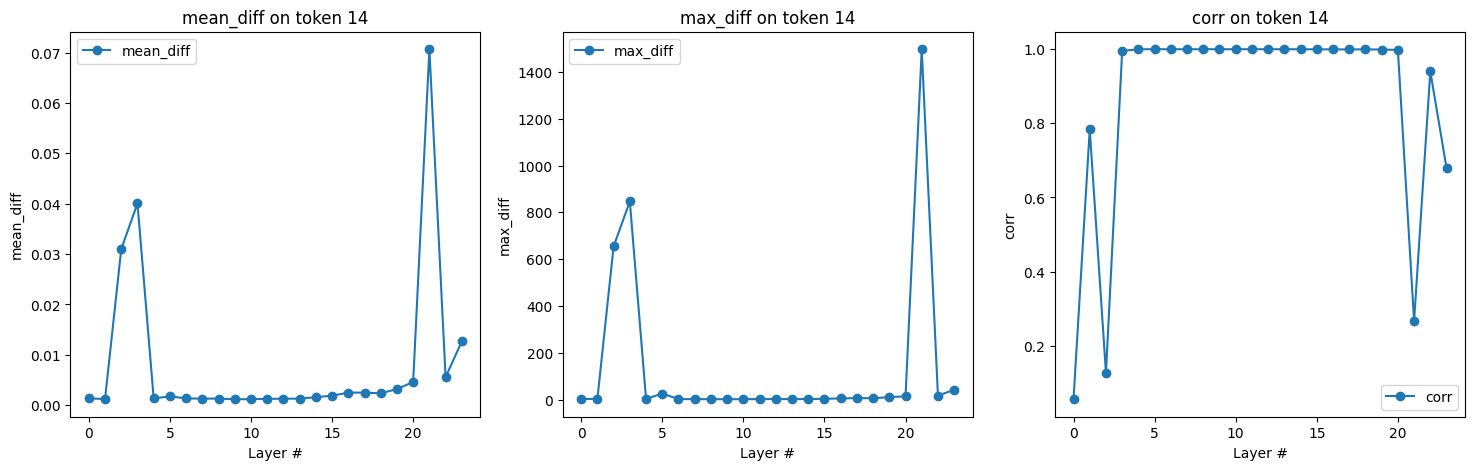

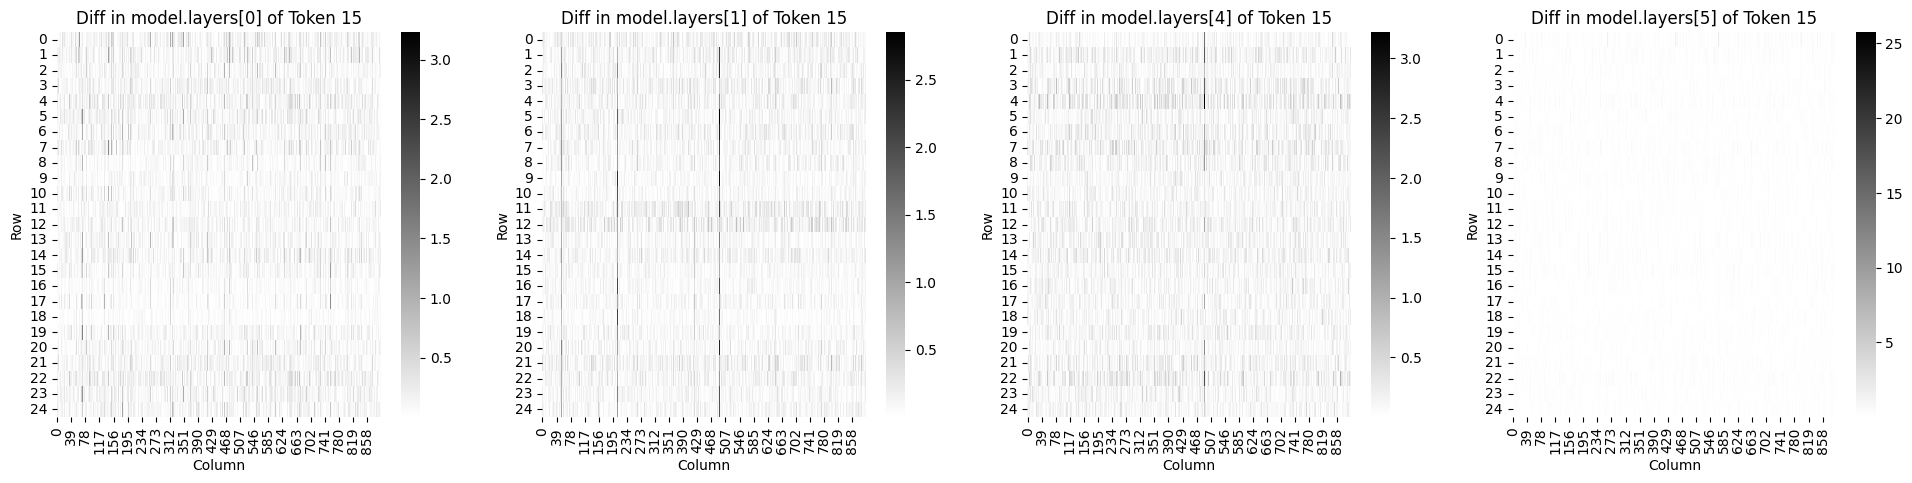

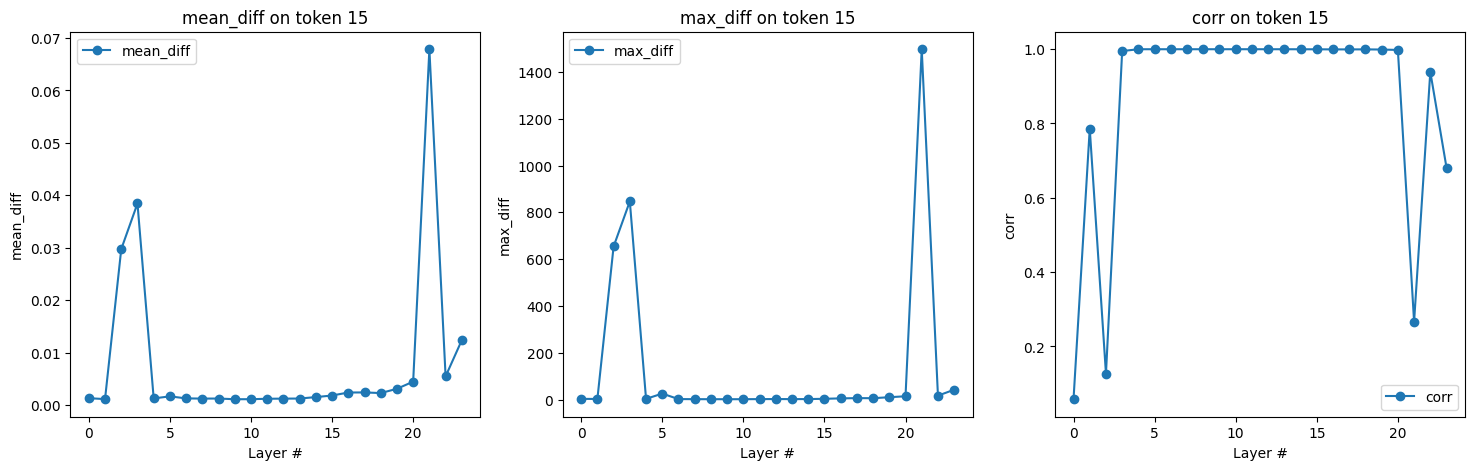

In [3]:
vertical_comparison_of_forward_hook(
    hook_data = None,
    hook_data_path = hook_data_paths[5],
    hook_module_names = [f"model.layers[{i}]" for i in range(24)],
    comparison_index = ["mean_diff", "max_diff", "corr"],
    max_length = 16,
    figure_size = 5,
    watched_module_names = [f"model.layers[{i}]" for i in [0, 1, 4, 5]],
)

TypeError: 'Axes' object is not subscriptable

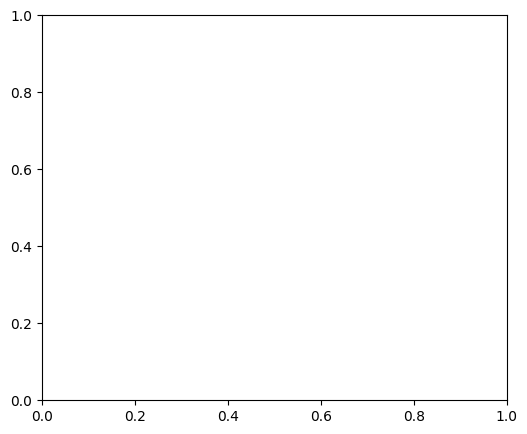

In [4]:
vertical_comparison_of_forward_hook(
    hook_data = None,
    hook_data_path = hook_data_paths[5],
    hook_module_names = [f"model.layers[{i}]" for i in range(24)],
    comparison_index = ["mean_diff"],
    max_length = 16,
    figure_size = 5,
)